# Capstone Project - The Battle of Neighborhoods | Finding a Better Place in Marrakech
____

*@author : __Mouad Choukhairi__*

## Finding a better place in Marrakech

### 1. Installation and Importation of Python Libraries and Dependencies


In [1]:
!pip install geocoder
!pip install folium

In [2]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import io
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


### 2. Data Extraction and Cleaning


Getting List of Postal Codes from POSTE MAROC. 
* URL: http://www.codepostal.ma/search_mot.aspx?keyword=marrakech

In [3]:
url = "http://www.codepostal.ma/search_mot.aspx?keyword=marrakech"
extracting_data = requests.get(url).text
DataC = BeautifulSoup(extracting_data, 'lxml')

# Extracting only table
Table = DataC.find('table', {'id':'DgCodeparAdresse'})
#print(Table)

print('Page Scrapped.')

Page Scrapped.


In [4]:
#Getting all values in tr and seperating each td within by ",""
dataC = list()
for rows in Table.find_all('tr'):
    
    row = rows.find_all('td')
    if row:
        city = row[0].text.rstrip()
        neighborhood = row[1].text.rstrip()
        postalcode = row[2].text.rstrip()
        dataC.append([postalcode, city, neighborhood])

#col_head = list()
#for cols in Table.find_all('td'):
#    col_head.append(cols.text.strip())

print('Cleaning. Part-1')

Cleaning. Part-1


In [5]:
#Converting into dataframe and assigning column names
df = pd.DataFrame(dataC)

df_tmp = df.to_csv(header=1,index=False)
df2 = pd.read_csv(io.StringIO(u""+df_tmp), header=1)

df2.columns = ['PostalCode','City','Neighborhood']

print('Dataframe Created.')

Dataframe Created.


In [6]:
df2.head(10)

,PostalCode,City,Neighborhood
0,20630,CASABLANCA,DIOUR MARRAKECH
1,20020,CASABLANCA,MARCHE BAB MARRAKECH
2,14000,KENITRA,IMMEUBLE MARRAKECH
3,14090,KENITRA,IMMEUBLE MARRAKECH
4,15020,KHEMISSET,HAY MARRAKECH
5,42072,MARRAKECH,ABADOU
6,40090,MARRAKECH,ABDELLAOUIA
7,40160,MARRAKECH,ABRAJ EL KOUTOUBIA
8,40170,MARRAKECH,AFAK
9,40170,MARRAKECH,AFAK 1


In [7]:
#Only Marrakech City
df_new = df2.loc[df2['City'] == 'MARRAKECH']
df_new.head(10)

,PostalCode,City,Neighborhood
5,42072,MARRAKECH,ABADOU
6,40090,MARRAKECH,ABDELLAOUIA
7,40160,MARRAKECH,ABRAJ EL KOUTOUBIA
8,40170,MARRAKECH,AFAK
9,40170,MARRAKECH,AFAK 1
10,40170,MARRAKECH,AFAK 2
11,40272,MARRAKECH,AGAFAY
12,42472,MARRAKECH,AGHBALOU
13,40022,MARRAKECH,AIN ITTI
14,40150,MARRAKECH,AIN MEZOUAR


In [8]:
marrakech = df_new
#Setting index number to 0
marrakech.index = range(len(marrakech))

print('Cleaning. Part-2')

Cleaning. Part-2


In [9]:
marrakech.head()

,PostalCode,City,Neighborhood
0,42072,MARRAKECH,ABADOU
1,40090,MARRAKECH,ABDELLAOUIA
2,40160,MARRAKECH,ABRAJ EL KOUTOUBIA
3,40170,MARRAKECH,AFAK
4,40170,MARRAKECH,AFAK 1


In [10]:
print('The DataFrame shape is', marrakech.shape)

The DataFrame shape is (3274, 3)


### The above result shows that there are 3274 different Neighborhoods in Marrakech.
* Now let create a BAR PLOT to show different Neighborhoods in Marrakech.

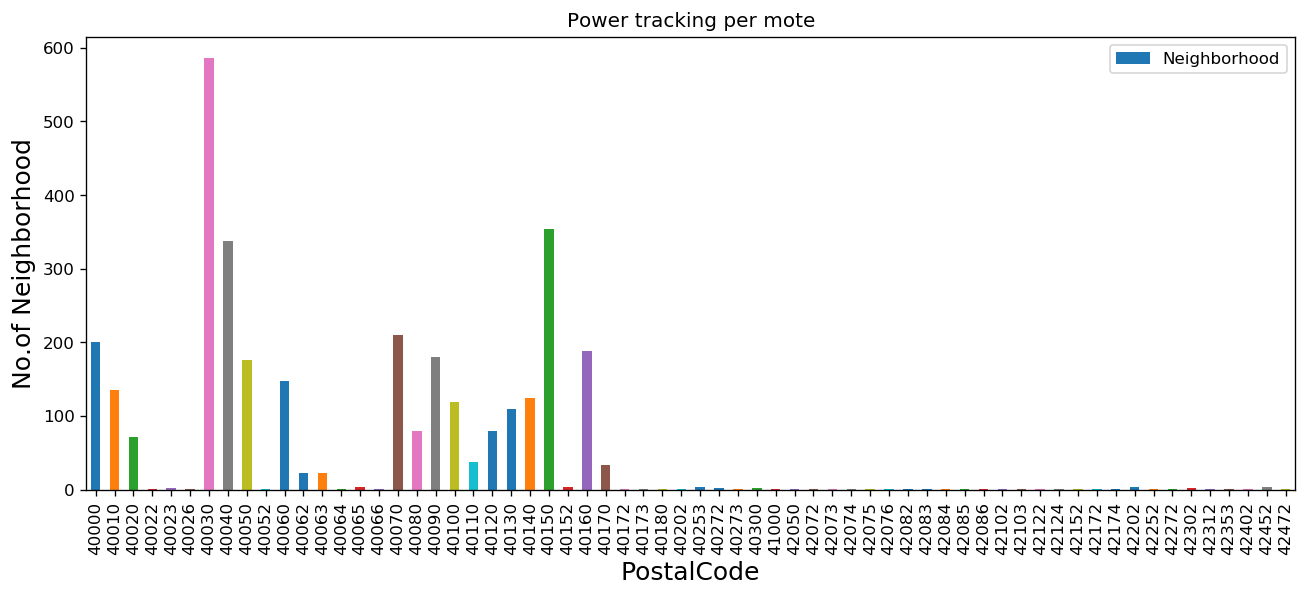

In [11]:
plt.figure(figsize=(13,5), dpi = 120)
# title
plt.title('Power tracking per mote')
#On x-axis
plt.xlabel('Postal Code', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
marrakech.groupby('PostalCode')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

From the above Bar Plot, we can see that  the Postal Code **40030** has highest number of neighborhoods.

In [12]:
len(marrakech[marrakech['PostalCode']==40030])

586

In [13]:
def Get_coords(postal_code,neighborhood):
    location = None
    while(location is None):
        #----Fetch for coordinates based on neighborhood & postal code----
        g = geocoder.arcgis('{}, Marrakech {}, Maroc'.format(neighborhood,postal_code))
        location = g.latlng
        #print("{}".format(location))
    #----Return Coordinates----
    return location

Get_coords('40000','GUELIZ')

[31.652670000000057, -8.005549999999971]

In [14]:
# Retrieving Geographical Co-ordinates
postal_codes = marrakech['PostalCode']
neighs_lst = marrakech['Neighborhood']

coords = [ Get_coords(i,j) for i,j in zip(postal_codes.tolist(),neighs_lst.tolist()) ]


# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
marrakech['Latitude'] = df_coords['Latitude']
marrakech['Longitude'] = df_coords['Longitude']

In [15]:
#save data to a csv sheet
marrakech.to_csv('Geospatial_Coordinates_Marrakech.csv', index=False)

In [16]:
df_coords = pd.read_csv('Geospatial_Coordinates_Marrakech.csv')
df_coords.columns=['Latitude', 'Longitude']
marrakech['Latitude'] = df_coords['Latitude']
marrakech['Longitude'] = df_coords['Longitude']

In [17]:
marrakech.head(10)

,PostalCode,City,Neighborhood,Latitude,Longitude
0,42072,MARRAKECH,ABADOU,31.62534,-7.30740
1,40090,MARRAKECH,ABDELLAOUIA,31.63382,-8.00223
2,40160,MARRAKECH,ABRAJ EL KOUTOUBIA,31.66184,-8.00724
3,40170,MARRAKECH,AFAK,31.65412,-7.99841
4,40170,MARRAKECH,AFAK 1,31.65412,-7.99841
5,40170,MARRAKECH,AFAK 2,31.65412,-7.99841
6,40272,MARRAKECH,AGAFAY,31.49506,-8.17719
7,42472,MARRAKECH,AGHBALOU,31.30726,-7.73818
8,40022,MARRAKECH,AIN ITTI,31.63382,-8.00223
9,40150,MARRAKECH,AIN MEZOUAR,31.62504,-8.03545


In [18]:
#rows with same postalcode,latitude & longitude will be combined into one row with the neighborhoods separated with ", "
#marrakech = marrakech.groupby(['PostalCode','Latitude','Longitude'])['Neighborhood'].apply(', '.join).reset_index()
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = marrakech.groupby(['PostalCode','Latitude','Longitude'])

marrakech = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

print('Cleaning. Part-3')

Cleaning. Part-3


In [19]:
marrakech.head()

,PostalCode,Latitude,Longitude,Neighborhood
0,40000,31.514265,-9.769298,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS..."
1,40000,31.595138,-7.963173,QUARTIER TARIQ IBNOU ZIAD
2,40000,31.596659,-8.047614,LOTISSEMENT ERRACHIDIA
3,40000,31.603320,-8.003300,RESIDENCE MOUNA
4,40000,31.604750,-7.971450,"LOTISSEMENT AL MHITA, LOTISSEMENT ALBEK, LOTIS..."


In [20]:
print('The DataFrame shape is', marrakech.shape)

The DataFrame shape is (1387, 4)


In [21]:
#Split Data into 4 DataFrames for easy process
split=(len(marrakech)+1)//4

marrakech_1=marrakech.iloc[:split]
marrakech_2=marrakech.iloc[split:split*2]
marrakech_3=marrakech.iloc[split*2:split*3]
marrakech_4=marrakech.iloc[split*3:]

In [22]:
print('DF1 :',marrakech_1.shape)
print('DF2 :',marrakech_2.shape)
print('DF3 :',marrakech_3.shape)
print('DF4 :',marrakech_4.shape)
print(''.center(70,'-'))
print('Total :',len(marrakech_1)+len(marrakech_2)+len(marrakech_3)+len(marrakech_4))

DF1 : (347, 4)
DF2 : (347, 4)
DF3 : (347, 4)
DF4 : (346, 4)
----------------------------------------------------------------------
Total : 1387


In [23]:
address = 'Marrakech, Maroc'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of '+address+' are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Marrakech, Maroc are 31.6258257, -7.9891608.


## 3. Map of Marrakech

In [24]:
map_Marrakech = folium.Map(location=[latitude_x, longitude_y], zoom_start=13)

# add a red circle marker to represent Marrakech

folium.features.CircleMarker(
    [latitude_x, longitude_y],
    radius=10,
    color='green',
    popup='MARRAKECH',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(map_Marrakech)

for lat, lng, nei in zip(marrakech['Latitude'], marrakech['Longitude'], marrakech['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Marrakech)  
    
map_Marrakech

In [25]:
address = 'Marrakech, Maroc'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The Geograpical Co-ordinate of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Neighborhood_1 are 31.6258257, -7.9891608.


In [26]:
#@hiddel_cell
CLIENT_ID = '' # my Foursquare ID
CLIENT_SECRET = '' # my Foursquare Secret
VERSION = '20200608' # my Foursquare API Version
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

In [27]:
radius = 700 
LIMIT = 20
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
    longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [28]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups'],
      dtype='object')

In [29]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### 4. Nearby Venues/Locations


In [30]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Riad Monceau,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",31.624644,-7.987033
1,Roti d'Or,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",31.626771,-7.986339
2,Les Bains de L'alhambra,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",31.624470,-7.986323
3,Hôtel & Ryad Art Place,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",31.625273,-7.987831
4,Café Kif Kif,"[{'id': '4bf58dd8d48988d1c3941735', 'name': 'M...",31.625212,-7.992328


### 5. Categories of Nearby Venues/Locations

In [31]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Riad Monceau,Hotel,31.624644,-7.987033
1,Roti d'Or,Burger Joint,31.626771,-7.986339
2,Les Bains de L'alhambra,Spa,31.624470,-7.986323
3,Hôtel & Ryad Art Place,Hotel,31.625273,-7.987831
4,Café Kif Kif,Moroccan Restaurant,31.625212,-7.992328


**Top 10 Categories**

In [32]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Moroccan Restaurant    5
Hotel                  4
Café                   2
Bed & Breakfast        2
Historic Site          1
Plaza                  1
Spa                    1
Bistro                 1
Hostel                 1
Resort                 1
Name: categories, dtype: int64

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius = 700, LIMIT = 20):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        '''venues_list=[]
        for v in venue_results:
            try:
                venue_name=v['venue']['name']
                venue_latit=v['venue']['location']['lat']
                venue_longti=v['venue']['location']['lng']
                venue_categ=v['venue']['categories'][0]['name']
                venues_list.append([name,lat,lng,venue_name,venue_latit,venue_longti,venue_categ])
            except KeyError:
                pass'''
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

We define a function to intract with FourSquare API and get top 20 venues within a radius of 700 metres for a given latitude and longitude. Below function will return us the venue id , venue name and category.


In [34]:
def get_venues(lat,lng,radius=700,LIMIT = 20):
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [35]:
def get_venue_details(venue_id):
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_price=venue_data['price']['tier']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_price])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Price']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [36]:
# Nearby Venues 1st Data Frame
Marrakech_1_venues = getNearbyVenues(names=marrakech_1['Neighborhood'],
                                   latitudes=marrakech_1['Latitude'],
                                   longitudes=marrakech_1['Longitude']
                                  )

COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSSEF BEN TACHFINE
QUARTIER TARIQ IBNOU ZIAD
LOTISSEMENT ERRACHIDIA
RESIDENCE MOUNA
LOTISSEMENT AL MHITA, LOTISSEMENT ALBEK, LOTISSEMENT HASSANIA, LOTISSEMENT IMAD EDDINE, LOTISSEMENT IMAD EDDINE ZAHRA, LOTISSEMENT LAMHITA, LOTISSEMENT SEMLALIA, LOTISSEMENT SIHAM, LOTISSEMENT SOCARANDA, LOTISSEMENT TAOUFIK, LOTISSEMENT TAWFIK, LOTISSEMENT THAMI
IMMEUBLE BACHA
DERB ZAHRA I
LOTISSEMENT SBAIA, LOTISSEMENT SBAIYA, RESIDENCE SBAI, RESIDENCE SBAIA
IMMEUBLE MESSOUADI
IMMEUBLE HAJ BRAHIM
RESIDENCE HAYAT
LOTISSEMENT MOSTAKBAL
LOTISSEMENT SAADIA
JARDIN PACHA
QUARTIER MANSOUR EDDAHBI
IMMEUBLE BEN ABDELLAH
ARSATE BATA, ARSATE SBAI
CITE GARDEN
RESIDENCE RAHMA
LOTISSEMENT FILALIA
MARCHE IBEN TOUMERTE
OPERATION SAADIA, QUARTIER SAADIA
RESIDENCE MOULAY YOUSSEF
RESIDENCE AMANE
JARDIN DES ARTS
IMMEUBLE AGHOUATIM C, IMMEUBLE AKIOUD B, IMMEUBLE AKIOUD C, IMMEUBLE AKIOUD D, IMMEUBLE AKIOUD E, IMMEUBLE ANAS, IMMEUBLE ANBER, IMMEUBLE AYA, IMMEUBLE BELLA, IMMEUBLE BE

SOUK
DERB MIARA
KISSARIAT BERRADA
DERB BEN BLALL
DERB SLIMA
DERB LAAFOU
DERB EL MAADA
DERB OUARZAZATE
DERB DARIH 2
HART SOURA, SOUK SIOUR
DERB CHIRI, DERB CHKIRI
DERB DARIH
QUARTIER LA POTERNE
DERB RAOUIA, DERB ZAOUIA, DERB ZAOUIA FATIHIA, ZAOUIA
DERB SIDI SAID AHENSSAL
DERB ZEMRANE
DERB SEKAYA
COMPLEXE ARTISANAL
DERB CHERKACHI
QUARTIER JAMA EL FNA
ARSATE AHBASSE, ARSATE ALI OUSALAH, ARSATE ALI SALAH, ARSATE AREST EL FASSI, ARSATE ASSOUEL, ARSATE BEN NACER, ARSATE BEN OMAR, ARSATE BNI FARAH, ARSATE EL FASSI DIOUR JDAD, ARSATE EL GATIOUI, ARSATE EL HAMED, ARSATE EL MELLAK, ARSATE GUESSOUS, ARSATE IHIRI, ARSATE MAMED, ARSATE MELLAK
DERB CHAMAA
DERB TBIB
DERB RAHBA LAKDIMA
DERB LAADAM
SOUK EL BAHJA
DERB HMER
DERB LAAROUSSI
DERB HAMRI SGHIR
SOUK BAB FTEUHE
DERB LAFKIH SBAII
DERB DALIA
DERB AKRAB
DERB BA SALEH
DERB EL MAAROUFI
DERB SIDI EL KOURI
DERB LEKBIR
DERB MESSAOUI
DERB DEFA OU REBAA
DERB ROKNI, ROKNI
DERB TIJANI
DERB HAJ OMAR
BEN SALAH, QUARTIER BEN SALAH
DERB HAJAMA
DERB CAID RASSOU

In [46]:
# Nearby Venues 2nd Data Frame
Marrakech_2_venues = getNearbyVenues(names=marrakech_2['Neighborhood'],
                                   latitudes=marrakech_2['Latitude'],
                                   longitudes=marrakech_2['Longitude']
                                  )

DBAGHE
DERB SIDI BOUAAMER, IMMEUBLE SIDI BOUAAMER
DERB SIDI MAKHLOUF, SIDI MAKHLOUF
DERB EL HAJ BOURHIM MOUKEF
DERB BERRAZOUK
DERB LALLA BENT AMRI
DERB ZEMMOURI
DERB NAKHLA, DERB NAKHLA TOUALA
DERB BEN RAHAL
DERB SIDI MESSAOUD SGHIR, DOUAR SIDI MESSAOUD SGHIR
DERB LAARIFA
DERB SBIH, DERB SBIHI, RESIDENCE SBIH
HAY AL JAZOULI
ARSATE BARADAI JDIDA, ARSATE BARADAI KDIMA, ARSATE BERDAI
DERB LAMSSOUBER
DERB DERDOUBA
BEL BAKKAR, DERB BEL BAKKAR
BAB TAGHZOUT
DERB FERRANE SGHIR
DERB BOUALILOU
QUARTIER BAB DOUKKALA
DERB EL FILALI ANTAKI
DERB BEN ALLAL, DERB BEN ALLAL 1, DERB BEN ALLAL 2
QUARTIER AHL FASE, QUARTIER EL MAHDI
DERB SIMOUHE, SIMOUHE
BAB LAKHMIS
ARSATE BEN RAHMOUNE, DERB BENRAHMOUN SGHIR
ARSATE BEN BRAHIM
DERB BEN MOUSSA
DERB BENRAHMOUN LAKBIR, DERB BERHAMOUNE SGHIR, DERB BERHMOUNE ELKABIR
DERB SIDI HMAD OU MOUSSA, RESIDENCE SIDI HMAD OU MOUSSA
QUARTIER SIDI ABDELLAZIZ, QUARTIER SIDI AYOUB
DERB BERRADA
DERB LAMKADEM
DERB EL BAROUD
DERB MAHROUK
DERB EL KARMA
DOUAR SI ALLAL LAGLAOUI, SI

QUARTIER RYAD ZITOUNE JDID
DOUAR EL AIN
RESIDENCE MEDINA 4
DOUAR SIDI YOUSSEF BEN ALI, RESIDENCE SIDI YOUSSEF BEN ALI, SIDI YOUSSEF BEN ALI
DOUAR TRABE EL MAADEN
LOTISSEMENT JNANE 4
COOPERATIVE NAKHIL
LOTISSEMENT MERSTANE
LOTISSEMENT TASSELTANTE 3, LOTISSEMENT TASSOULTANTE
LOTISSEMENT RIAD, LOTISSEMENT RIAD AGDAL, LOTISSEMENT RIAD ALGHAZALA
DERB EL BARRADA
SOUK BOULARBAH
DERB GUERRABA, DERB GUERRABE
DERB CHICHAOUI
DERB EL MEKHZNI
DERB AIT IMOUR
DERB ZAHIRI, DERB ZAHRI, ZAHRI
DERB BEN FARESS
DERB BOUAALAM
DERB ABDELLAH EL KAHAUAJI
DERB CHAABA FOUKANIA
DERB AMZIANE
DERB NACIRI
QUARTIER SIDI YOUSSEF BEN ALI
DERB AYAD
DERB FARES KHACHAB
DERB CHAABA AL OUSTA
DERB TBAILI
DERB MASSI
DERB AIT AUAARAB
DERB EL HARAR
DERB BOULHBAL
DERB EL BAHLOUL
DERB HADJ MAHJOUB
DERB CHAOUCH
DERB AIT BAHA
DERB LAMSSALLAH
DERB AL ASSASS
DERB MY LYAZID
DERB AGOURAM
DERB EL FADEL
DERB MHARMI
DERB OULED ZOUBAIR
DERB EL HADDAD
DERB RHAMNA
DERB EL HASSAR
DERB ESSAADIYINE
DERB EL KABIRE
DERB FATH
DERB EL GADA, DERB EL

In [47]:
# Nearby Venues 3rd Data Frame
Marrakech_3_venues = getNearbyVenues(names=marrakech_3['Neighborhood'],
                                   latitudes=marrakech_3['Latitude'],
                                   longitudes=marrakech_3['Longitude']
                                  )

DIOUR ECHOUHADA, QUARTIER CHOUHADA II
DERB EL KHADIR
DERB EL BIR
DERB CHERARDA
ARSATE EL KAHDIR, DOUAR ARSET EL KHADIR
DERB EL BOUMBI
DERB MOULAY EL GHALI
DERB EL HAJAM
IMMEUBLE CADI AYAD, IMMEUBLE RABIAA 1, IMMEUBLE RABIAA 2, IMMEUBLE RABIAA 3
CITE SYBA 1, DERB ABDELMOUJOUD, DERB AITOUNA, DERB ALHIANE, DERB BELAAZIZE, DERB BELCADI, DERB BOUSSLAME, DERB CHEHAM, DERB CHICHAWA, DERB CIMO, DERB DAOUDI, DERB DARKAWA, DERB EL FADILI, DERB EL GABASS, DERB EL MASJID, DERB HEMAD OU ALI, DERB HESSASSNA, DERB KABA, DERB KASSEM, DERB LABSSIR, DERB LAKWASSERIE, DERB LIMOURI, DERB MDARSSI, DERB MHIOUI, DERB MY BOUBKER, DERB NBIGA, DERB OULAD ZBIR, DERB SEBAATE LAOUI, DIOUR MANKOUBINE, DIOUR NBIGUA, DOUAR AMAZIANE, DOUAR BOMBIE, DOUAR JDID, DOUAR SYBA 3, FERME LADHAM, HAY RIAD, OPERATION JBILAT B, OPERATION TRABE EL MAADEN, QUARTIER RIAD ALGHAZALA, RIAD, SOUK RABIAA, SYBA, SYBA 1, SYBA 2, SYBA 3, SYBA 3 RIAD, SYBA 4
DERB EL BAKKAL
QUARTIER AL MAKINA
BERRADA
DERB SYBA 2, DERB SYBA 4, LOTISSEMENT SYBA

LOTISSEMENT EL HAMRA I, LOTISSEMENT HAMRA, LOTISSEMENT HAMRA II
LAKSOUR, LOTISSEMENT LAKSOUR, LOTISSEMENT LAKSOUR BORI
LOTISSEMENT NOUJOUM, RESIDENCE NOUJOUM I, RESIDENCE NOUJOUM II
IMMEUBLE NOUJOUM II A, IMMEUBLE NOUJOUM II B, IMMEUBLE NOUJOUM II C, IMMEUBLE NOUJOUM II D, IMMEUBLE NOUJOUM II E, IMMEUBLE NOUJOUM II F, IMMEUBLE NOUJOUM II G, IMMEUBLE NOUJOUM II H, IMMEUBLE NOUJOUM II I, IMMEUBLE NOUJOUM II J, IMMEUBLE NOUJOUM II K, IMMEUBLE NOUJOUM II L
RESIDENCE SAAD ALLAH
LOTISSEMENT BOUGHARBAL
COMPLEXE DAR BAL BIR WA ALIHSSANE, COMPLEXE JAWHARATE AL OMRANE, DOUAR BEN SALEK, HAY BOUMASMAR, HAY SAADALLAH, LOTISSEMENT DAR AL BIR OUAL IHSSAN, OPERATION DALIA 1, OPERATION GARCIA, OPERATION HOUDA, OPERATION SAADALLAH, OPERATION SOUNBOULA, QUARTIER TALOUJETE 1, RESIDENCE SOUNBOULA, SEDK, SOUK SAAD ALLAH, ZAITOUNE
QUARTIER EL RAZI
LOTISSEMENT BOUMESMAR
HOPITAL CHU MED 6
RESIDENCE MAJORELLE I, RESIDENCE MAJORELLE II, RESIDENCE MAJORELLE III
RESIDENCE DALIA
LOTISSEMENT EL HAMZA
HAY EL BADIA
LO

RESIDENCE OURIDA 2
LOTISSEMENT MASMOUDI
LOTISSEMENT MARJANA
RESIDENCE OULIVIER TARGA
ARSATE TARGA
LOTISSEMENT OUARZAZI
JNANE BACHIR 1, JNANE BACHIR 2
RESIDENCE MIMOSA
RESIDENCE LES ROSES TARGA
QUARTIER TARGA VEVRIER, QUARTIER TARGA ZEDDAGHIA, QUARTIER TARGUA ZDAGHIA
COMPLEXE BORJ TARGA, DOUAR SIDI DAOU, DOUAR SIDI DOU, HAY STOUKIA, JNANE TARGA, OPERATION NAKHIL I, QUARTIER ASMADI FADILA, QUARTIER ASMADI HASSANIA, QUARTIER CLOS ODETTE, QUARTIER SANS PARIEL, RESIDENCE ALCASBA BLEU MAJORELLE, RESIDENCE KSAR TARGA, RESIDENCE LES ORAGIER DE TARGA, SANS PARIEL, STOUKIA
LOTISSEMENT JAZOULIA
RESIDENCE YACOUT
LOTISSEMENT ABDERRAHMAN
LOTISSEMENT EL KHAIR
JNANE BRIKA
LOTISSEMENT LALLA HAYA
LOTISSEMENT OTHMANE
RESIDENCE MARJANA
RESIDENCE LES ORANGERS
RESIDENCE LES DEUX TOURS
QUARTIER AMGALA, QUARTIER EZZAHRA, QUARTIER JAOUHAR, QUARTIER JAWHAR, QUARTIER KHEIR, QUARTIER MIMOUSA, QUARTIER OISIS, QUARTIER OUARZAZI, QUARTIER OURIDA, QUARTIER STOUKIA, QUARTIER YASMINA 2
RESIDENCE MARIOS
RESIDENCE TARGA 

In [49]:
# Nearby Venues 4th Data Frame
Marrakech_4_venues = getNearbyVenues(names=marrakech_4['Neighborhood'],
                                   latitudes=marrakech_4['Latitude'],
                                   longitudes=marrakech_4['Longitude']
                                  )

RESIDENCE EL MANAR 10
BLOC D 21
LOTISSEMENT LES PALEMIERS 2
RESIDENCE SOFIA EL WARDA
QUARTIER FARIDA, QUARTIER GUICHE, QUARTIER HAROUCHI, QUARTIER SOFIA
CITE AL BAHJA, HAY AL BAHJA
LOTISSEMENT QUARTIER INDUSTRIEL
LOTISSEMENT TARGA, RESIDENCE TARGA GARDEN, TARGA
JARDIN RHAMNA
JARDIN GUICH SIDI MBAREK
BLOC D 6
BLOC C 18
BLOC D 5
BLOC D 8
BLOC C 14
BLOC C 12
BLOC D 11
BLOC C 6
BLOC C 4
BLOC D 13
BLOC C 2
BLOC D 15
BLOC D 17
BLOC D 16
BLOC D 18
BLOC D 23
BLOC D 22
BLOC C 7
BLOC C 13
BLOC C 11
BLOC C 9
BLOC C 8
BLOC C 5
BLOC C 1
BLOC C 3
BLOC C 15
BLOC C 17
BLOC C 19
SOFIA EL HILAL
EL MANAR 10
BLOC D 4
SOUK LARBAA
HAY AL HARCH
HAY EL HASSANI
RESIDENCE IBN TOUMERT
DOUAR VILLAGE DE L ELECTRICIEN, VILLAGE DE L ELECTRICIEN
HAY MASSIRA 1 B, MASSIRA 1 B
HAY MASSIRA 2 B, MASSIRA 2 B, QUARTIER MASSIRA 2 B
HAY MASSIRA 3 B, MASSIRA 3 B, QUARTIER MASSIRA 3 B
KSOUR ASNI 2
OPERATION EL HAOUZ
RIAD EL ZAHRA
HAY MASSIRA 1, HAY MASSIRA 1 A, HAY MASSIRA 1 C, HAY MASSIRA 1 D, LOTISSEMENT MASSIRA 1, LOTISSEMEN

RESIDENCE EL MANAR 1, RESIDENCE EL MANAR 3, RESIDENCE EL MANAR 5
DERB EL MOUDENE
TAMARIS
LOTISSEMENT TAIF 2, TAIF 1
RESIDENCE TICHKA
LOTISSEMENT SALEM
RESIDENCE WAFA
LOTISSEMENT TENSIFTE
DERB ESAKKA
DERB KARIME
DERB AL MADRASSA
DERB JAMAA
HAY SOUROUR
LOTISSEMENT TOUDGHA, RESIDENCE TOUDGHA
LOTISSEMENT BENNANI SMIRES
FONDATION HASSAN 2
LOTISSEMENT EL KAMAL
QUARTIER AABAD, QUARTIER ESSAADA, QUARTIER ESSAGUIA, QUARTIER FAKHARA, QUARTIER KOUTTAB, QUARTIER MESSIOUI, QUARTIER SOCOMA, QUARTIER SOCOMA 2, QUARTIER SOCOMA B
WARDA
TARGA RESIDENCE A
QUARTIER INDUSTRIEL SAHRAOUA
YASMINA, YASSINE
LOTISSEMENT TARGA, LOTISSEMENT TARGA VEVRIER, RESIDENCE TARGA ZEDDAGHIA
UNITE TAMANSOURT
SAFSAF
TACHFINE
DERB CHRAIBI
LOTISSEMENT YASMINE
GROUPE ZERKTOUNI, IMMEUBLE ZERKTOUNI, RESIDENCE ZERKTOUNI
RESIDENCE ZOUINA
RESIDENCE SIDI LAMINE
QUARTIER EL FATH
DOUAR AL HARCH
SAADA
DOUAR HARBIL, HARBIL
KETTARA
QUARTIER ASSAISS
OUIRGANE, QUARTIER OUIRGANE
DOUAR M'HAMID
OPERATION BORJ OURIKA
DOUAR RHA
DOUAR EL MAASSERA


In [50]:
#save data to a csv sheet
Marrakech_1_venues.to_csv('Marrakech_1_venues.csv', index=False)
Marrakech_2_venues.to_csv('Marrakech_2_venues.csv', index=False)
Marrakech_3_venues.to_csv('Marrakech_3_venues.csv', index=False)
Marrakech_4_venues.to_csv('Marrakech_4_venues.csv', index=False)

In [51]:
#reading saved data
m_1_v = pd.read_csv('Marrakech_1_venues.csv')
m_2_v = pd.read_csv('Marrakech_2_venues.csv')
m_3_v = pd.read_csv('Marrakech_3_venues.csv')
m_4_v = pd.read_csv('Marrakech_4_venues.csv')

In [52]:
#Concat data frames into one
m_frames = [m_1_v, m_2_v, m_3_v, m_4_v]
Marrakech_venues=pd.concat(m_frames)

In [53]:
print('There are {} Uniques Categories.'.format(len(Marrakech_venues['Venue_Category'].unique())))
Marrakech_venues.groupby('Neighborhood').count().head()

There are 175 Uniques Categories.


,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
Neighborhood,,,,,,
"ABDELLAOUIA, COMPLEXE HABOUS, DAR SAAD, HAY ZAHIA, IMMEUBLE AL ABBASS 2, IMMEUBLE AL ABBASS 3, IMMEUBLE AL ABBASS I, IMMEUBLE AL MAJD, IMMEUBLE BEN ABDERRAZEK, IMMEUBLE MIFTAH EL KHIR, IMMEUBLE ROUIDATE 3 MAJORELLE, IMMEUBLE ROUIDATE MAJORELLE, LOTISSEMENT ROUIDATE 3 MAJORELLE, LOTISSEMENT ROUIDATE MAJORELLE, OPERATION ARFOUD, OPERATION NARJISSE, OPERATION ROUIDATE 1, OPERATION SARA, RESIDENCE MOUTASSALI, RESIDENCE SINKO, ROUIDATE, ROUIDATE 1, ROUIDATE 2, ROUIDATE 3, SINKO, TADRAKTI, TAIBA, ZAHIA",20,20,20,20,20,20
ABRAJ EL KOUTOUBIA,5,5,5,5,5,5
"AFAK, AFAK 1, AFAK 2",5,5,5,5,5,5
AGHBALOU,1,1,1,1,1,1
AIN ITTI,20,20,20,20,20,20


Next we will collect Restaurants & Hotels for each Neighborhood.

In [61]:
# prepare neighborhood list that contains Resturants
Marrakech_rests = Marrakech_venues[Marrakech_venues['Venue_Category']=='Restaurant']

column_names=['Neighborhood', 'Name', 'ID','Category_Venue']
Marrakech_rests_v1=pd.DataFrame(columns=column_names)

Marrakech_rests_lat = Marrakech_rests['Venue_Latitude']
Marrakech_rests_lng = Marrakech_rests['Venue_Longitude']
count=1
index=0

for i,j in zip(Marrakech_rests_lat.tolist(),Marrakech_rests_lng.tolist()):
    venues = get_venues(i,j)
    rests_marr=venues[venues['Category']=='Restaurant']
    print('(',count,'/',len(Marrakech_rests),')',
          'Restaurant in '+Marrakech_rests.values[index][0]+', '+Marrakech_rests.values[index][3]+':'+str(len(rests_marr)))
    
    for restaurant_detail in rests_marr.values.tolist():
        id, name_r , category_r=restaurant_detail
        Marrakech_rests_v1 = Marrakech_rests_v1.append({'Neighborhood': Marrakech_venues.values[index][0],
                                                'Name': name_r, 
                                                'ID': id,
                                                'Category_Venue' : category_r
                                               }, ignore_index=True)
    count+=1
    index+=1

( 1 / 482 ) Restaurant in COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSSEF BEN TACHFINE, Caravane café:3
( 2 / 482 ) Restaurant in COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSSEF BEN TACHFINE, umia:3
( 3 / 482 ) Restaurant in COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSSEF BEN TACHFINE, La Table De Madada:3
( 4 / 482 ) Restaurant in LOTISSEMENT AL MHITA, LOTISSEMENT ALBEK, LOTISSEMENT HASSANIA, LOTISSEMENT IMAD EDDINE, LOTISSEMENT IMAD EDDINE ZAHRA, LOTISSEMENT LAMHITA, LOTISSEMENT SEMLALIA, LOTISSEMENT SIHAM, LOTISSEMENT SOCARANDA, LOTISSEMENT TAOUFIK, LOTISSEMENT TAWFIK, LOTISSEMENT THAMI, Snak Boudaly:1
( 5 / 482 ) Restaurant in DERB ZAHRA I, Kafedaki:1
( 6 / 482 ) Restaurant in LOTISSEMENT SAADIA, Bleu d'Orange at Four Seasons Resort Marrakech:1
( 7 / 482 ) Restaurant in QUARTIER MANSOUR EDDAHBI, Azyr:1
( 8 / 482 ) Restaurant in JARDIN DES ARTS, Le Trou au Mur:1
( 9 / 482 ) Restaurant in RESIDENCE BATOUL, RESIDENCE BATOUL BAHJA, Restaurant Niagara:1
( 10 / 482 ) Restaurant in RES

( 117 / 482 ) Restaurant in DERB SEBAATOU RIJAL, OPERATION SEBAATOU RIJAL, Le Trou au Mur:1
( 118 / 482 ) Restaurant in DERB ANBOUB, Le Trou au Mur:1
( 119 / 482 ) Restaurant in DERB LAATABI, Le Trou au Mur:1
( 120 / 482 ) Restaurant in DERB LGASSABA LAKBIR, Le Trou au Mur:1
( 121 / 482 ) Restaurant in DERB HAJ AL KHADIR, Le Trou au Mur:1
( 122 / 482 ) Restaurant in DERB TIMIJA, Le Trou au Mur:1
( 123 / 482 ) Restaurant in DERB LGASSABA SGHIR, Le Trou au Mur:1
( 124 / 482 ) Restaurant in DERB FERNATCHI, Le Trou au Mur:1
( 125 / 482 ) Restaurant in DERB WAYHAH, Le Trou au Mur:1
( 126 / 482 ) Restaurant in DERB AGHRISS, Le Trou au Mur:1
( 127 / 482 ) Restaurant in IMMEUBLE SIDI SOUSSANE, SIDI SOUSSANE, Le Trou au Mur:1
( 128 / 482 ) Restaurant in DERB CINCO, Le Trou au Mur:1
( 129 / 482 ) Restaurant in DERB DOULA, Le Trou au Mur:1
( 130 / 482 ) Restaurant in DERB CHAKROUNE, Le Trou au Mur:1
( 131 / 482 ) Restaurant in DERB BOUHARBA, Le Trou au Mur:1
( 132 / 482 ) Restaurant in DERB BABOU

( 226 / 482 ) Restaurant in DERB EL HARRAR, Kafedaki:1
( 227 / 482 ) Restaurant in DERB LOUAHE, Kafedaki:1
( 228 / 482 ) Restaurant in DERB SAGUIA, Kafedaki:1
( 229 / 482 ) Restaurant in LOTISSEMENT SAKA KHIYATA, Bleu d'Orange at Four Seasons Resort Marrakech:1
( 230 / 482 ) Restaurant in QUARTIER JAMAA ELKBIR, QUARTIER JEMAA, Le tobsil:1
( 231 / 482 ) Restaurant in DERB DABACHI, Le Trou au Mur:1
( 232 / 482 ) Restaurant in DERB BOUTOUIL, Le Trou au Mur:1
( 233 / 482 ) Restaurant in DERB CHERRATA, Le Trou au Mur:1
( 234 / 482 ) Restaurant in LOTISSEMENT ZAOUIT SIDI HNINI, Le Trou au Mur:1
( 235 / 482 ) Restaurant in DERB DOULA, Le Trou au Mur:1
( 236 / 482 ) Restaurant in QUARTIER BAB HMR, Le Trou au Mur:1
( 237 / 482 ) Restaurant in DERB EL FERRANE, DERB FERRANE LAKDIM, Le Trou au Mur:1
( 238 / 482 ) Restaurant in DERB EL FERRANE, DERB FERRANE LAKDIM, Ristorante I Limoni:2
( 239 / 482 ) Restaurant in QUARTIER EL KANARIYA, Restaurant Niagara:1
( 240 / 482 ) Restaurant in DERB SOUIRA, R

( 330 / 482 ) Restaurant in LOTISSEMENT BADII, LOTISSEMENT BADII II, LOTISSEMENT BOUKAAT AL KHAIR, LOTISSEMENT IKHTIYAR, LOTISSEMENT LAARBI, LOTISSEMENT RAZI, LOTISSEMENT SEDK, LOTISSEMENT TALOUJT 1, LOTISSEMENT TALOUJT 2, LOTISSEMENT ZAITOUNE, Snak Boudaly:1
( 331 / 482 ) Restaurant in LAKSOUR, LOTISSEMENT LAKSOUR, LOTISSEMENT LAKSOUR BORI, Le tobsil:1
( 332 / 482 ) Restaurant in LOTISSEMENT BOUGHARBAL, Le Trou au Mur:1
( 333 / 482 ) Restaurant in QUARTIER EL RAZI, Restaurant Niagara:1
( 334 / 482 ) Restaurant in LOTISSEMENT BOUMESMAR, Ristorante I Limoni:2
( 335 / 482 ) Restaurant in HOPITAL CHU MED 6, Restaurant Niagara:1
( 336 / 482 ) Restaurant in LOTISSEMENT EL HAMZA, Restaurant L'orangeraie Tikida Garden hôtel:1
( 337 / 482 ) Restaurant in OPERATION DALIA 2, Café-Restaurant Marjana:1
( 338 / 482 ) Restaurant in QUARTIER BEN SALEK, QUARTIER LAKSOUR, QUARTIER MERSTANE 3, Café-Restaurant Marjana:1
( 339 / 482 ) Restaurant in LOTISSEMENT ABDELLAOUIA, LOTISSEMENT AMAGHOUS, LOTISSEMEN

( 419 / 482 ) Restaurant in LOTISSEMENT BARRADI 3, Kafedaki:1
( 420 / 482 ) Restaurant in LOTISSEMENT TAMESLOUHTE, Kafedaki:1
( 421 / 482 ) Restaurant in RESIDENCE ZAHIRI, Kafedaki:1
( 422 / 482 ) Restaurant in TBAILI, Kafedaki:1
( 423 / 482 ) Restaurant in DERB EL OUED, Kafedaki:1
( 424 / 482 ) Restaurant in RESIDENCE RHAMNA, Kafedaki:1
( 425 / 482 ) Restaurant in RESIDENCE LA CARELLE, Bleu d'Orange at Four Seasons Resort Marrakech:1
( 426 / 482 ) Restaurant in LOTISSEMENT SAADA MENARA, Bleu d'Orange at Four Seasons Resort Marrakech:1
( 427 / 482 ) Restaurant in RESIDENCE ISLANE, RESIDENCE ISLANE 3, RESIDENCE ISLANE 4, Bleu d'Orange at Four Seasons Resort Marrakech:1
( 428 / 482 ) Restaurant in IMMEUBLE LES CERISIERS, Bleu d'Orange at Four Seasons Resort Marrakech:1
( 429 / 482 ) Restaurant in RESIDENCE EL MANAR 6, Bleu d'Orange at Four Seasons Resort Marrakech:1
( 430 / 482 ) Restaurant in EL MANARA, Bleu d'Orange at Four Seasons Resort Marrakech:1
( 431 / 482 ) Restaurant in TICHI, 

In [65]:
# prepare neighborhood list that contains Hotels
Marrakech_hotels = Marrakech_venues[Marrakech_venues['Venue_Category']=='Hotel']

column_names=['Neighborhood', 'Name', 'ID','Category_Venue']
Marrakech_hotels_v1=pd.DataFrame(columns=column_names)

Marrakech_hotels_lat = Marrakech_hotels['Venue_Latitude']
Marrakech_hotels_lng = Marrakech_hotels['Venue_Longitude']
count=1
index=0

for i,j in zip(Marrakech_hotels_lat.tolist(),Marrakech_hotels_lng.tolist()):
    venues = get_venues(i,j)
    hotels_marr=venues[venues['Category']=='Hotel']
    print('(',count,'/',len(Marrakech_hotels),')',
          'Hotel in '+Marrakech_hotels.values[index][0]+', '+Marrakech_hotels.values[index][3]+':'+str(len(hotels_marr)))
    
    for hotel_detail in hotels_marr.values.tolist():
        id, name_h , category_h=hotel_detail
        Marrakech_hotels_v1 = Marrakech_hotels_v1.append({'Neighborhood': Marrakech_venues.values[index][0],
                                                'Name': name_h, 
                                                'ID': id,
                                                'Category_Venue' : category_h
                                               }, ignore_index=True)
    count+=1
    index+=1

( 1 / 2559 ) Hotel in COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSSEF BEN TACHFINE, Riad Malaika:2
( 2 / 2559 ) Hotel in COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSSEF BEN TACHFINE, Riad Mimouna:2
( 3 / 2559 ) Hotel in COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSSEF BEN TACHFINE, L'Heure Bleue Palais:4
( 4 / 2559 ) Hotel in LOTISSEMENT SBAIA, LOTISSEMENT SBAIYA, RESIDENCE SBAI, RESIDENCE SBAIA, Les Borjs De La Kasbah Hotel:7
( 5 / 2559 ) Hotel in LOTISSEMENT SBAIA, LOTISSEMENT SBAIYA, RESIDENCE SBAI, RESIDENCE SBAIA, La Villa Des Orangers Hotel Marrakech:5
( 6 / 2559 ) Hotel in LOTISSEMENT SBAIA, LOTISSEMENT SBAIYA, RESIDENCE SBAI, RESIDENCE SBAIA, Dar Les Cigognes:3
( 7 / 2559 ) Hotel in LOTISSEMENT SBAIA, LOTISSEMENT SBAIYA, RESIDENCE SBAI, RESIDENCE SBAIA, Riad Dar More:4
( 8 / 2559 ) Hotel in LOTISSEMENT SBAIA, LOTISSEMENT SBAIYA, RESIDENCE SBAI, RESIDENCE SBAIA, Riad Kasbah:7
( 9 / 2559 ) Hotel in LOTISSEMENT SBAIA, LOTISSEMENT SBAIYA, RESIDENCE SBAI, RESIDENCE SBAIA, Les Jard

( 80 / 2559 ) Hotel in RESIDENCE NADIA, Radisson Blu:1
( 81 / 2559 ) Hotel in ARSATE ALI OU HMAD, Riad Yasmine:7
( 82 / 2559 ) Hotel in ARSATE ALI OU HMAD, Riad Dyor:11
( 83 / 2559 ) Hotel in ARSATE ALI OU HMAD, Dar Soukaina:5
( 84 / 2559 ) Hotel in ARSATE ALI OU HMAD, Hotel Riad AnaYela:9
( 85 / 2559 ) Hotel in ARSATE ALI OU HMAD, Riad Shama Suites and Spa:8
( 86 / 2559 ) Hotel in ARSATE ALI OU HMAD, Riad Palacio De las Especias:9
( 87 / 2559 ) Hotel in ARSATE ALI OU HMAD, Riad Moullaoud:3
( 88 / 2559 ) Hotel in RESIDENCE AJIAD, Radisson Blu:1
( 89 / 2559 ) Hotel in RESIDENCE JAZOUD, Hotel Le Caspien:1
( 90 / 2559 ) Hotel in RESIDENCE JAZOUD, Radisson Blu:1
( 91 / 2559 ) Hotel in YASMINE MAJORELLE, Ryad Mogador Menzah Appart Hôtel:5
( 92 / 2559 ) Hotel in RESIDENCE SLIMANIA, Hotel Le Caspien:1
( 93 / 2559 ) Hotel in RESIDENCE SLIMANIA, Moroccan House Hotel Marrakech:2
( 94 / 2559 ) Hotel in RESIDENCE ISLY, Hotel Le Caspien:1
( 95 / 2559 ) Hotel in RESIDENCE ISLY, Moroccan House Hotel 

( 176 / 2559 ) Hotel in ALEGRO, CAMP EL GHOUL, COMPLEXE NAJD, COOPERATIVE TABOUK, DERB AL MAOUADA, DERB BELGHALI, DERB MOUNAFIR, DERB TIAMICHT, DERB ZIAT, DOUAR AKIOUD, DOUAR BOULAGHRAIB, DOUAR EL MERS, DOUAR SAFOU, HAY 114 NORD, HAY 114 SUD, HAY ALEGRO, HAY NOUR, QUARTIER BIN LAKCHALI, QUARTIER BOUIZAKAREN, QUARTIER LAHCEN AGHRIB, QUARTIER MOHA OUSAID ARZAS, QUARTIER MOHAMED SAFOU, QUARTIER OMAR CHENNA, QUARTIER SOULIMANE BEN ZOUBIR, RESIDENCE CHARLET TP, RESIDENCE DOMAINE DAVINCI, RESIDENCE MOUHANDISE, RESIDENCE MOUTAOUKIL, RESIDENCE TASSOUTE, SAKAN NAKHIL, SOUK LA PLACE, SOULIMANE BEN ZOUBIR, ZAITOUNE1, Riad Noir d'Ivoire:9
( 177 / 2559 ) Hotel in DERB ALI BEN EL HAJ, Riad Moullaoud:3
( 178 / 2559 ) Hotel in DERB ALI BEN EL HAJ, Riad Karmela:2
( 179 / 2559 ) Hotel in DERB ALI BEN EL HAJ, Dar Soukaina:5
( 180 / 2559 ) Hotel in DERB ALI BEN EL HAJ, Riad Safa:3
( 181 / 2559 ) Hotel in RESIDENCE ASSALA, RESIDENCE ASSALA III, Hotel Le Caspien:1
( 182 / 2559 ) Hotel in RESIDENCE ASSALA, R

( 268 / 2559 ) Hotel in DERB SIDI MESSAOUD, SOUK SIDI MESSAOUD, Les Jardins de La Medina,  Marrakech:5
( 269 / 2559 ) Hotel in DERB SIDI MESSAOUD, SOUK SIDI MESSAOUD, Dar Les Cigognes:3
( 270 / 2559 ) Hotel in DERB SIDI MESSAOUD, SOUK SIDI MESSAOUD, Riad Kasbah:7
( 271 / 2559 ) Hotel in DERB SIDI MESSAOUD, SOUK SIDI MESSAOUD, Riad Dar More:4
( 272 / 2559 ) Hotel in DERB SIDI MESSAOUD, SOUK SIDI MESSAOUD, Riad La Porte Rouge:5
( 273 / 2559 ) Hotel in DERB SIDI MESSAOUD, SOUK SIDI MESSAOUD, Riad Nesma:4
( 274 / 2559 ) Hotel in DERB EL JDID, DERB JDID, DERB JDID EL KBIR, DERB JDID SGHIR, DERB JDID TABHIRTE, Les Borjs De La Kasbah Hotel:7
( 275 / 2559 ) Hotel in DERB EL JDID, DERB JDID, DERB JDID EL KBIR, DERB JDID SGHIR, DERB JDID TABHIRTE, La Villa Des Orangers Hotel Marrakech:5
( 276 / 2559 ) Hotel in DERB EL JDID, DERB JDID, DERB JDID EL KBIR, DERB JDID SGHIR, DERB JDID TABHIRTE, Les Jardins de La Medina,  Marrakech:5
( 277 / 2559 ) Hotel in DERB EL JDID, DERB JDID, DERB JDID EL KBIR, 

( 373 / 2559 ) Hotel in DERB HMER, Palais Sebban:7
( 374 / 2559 ) Hotel in DERB HMER, Riad Dixneuf:6
( 375 / 2559 ) Hotel in DERB HMER, El Fenn:8
( 376 / 2559 ) Hotel in DERB HMER, Hôtel & Ryad Art Place:5
( 377 / 2559 ) Hotel in DERB HMER, Les Jardins De La Koutoubia Hotel Marrakech:8
( 378 / 2559 ) Hotel in DERB LAAROUSSI, Riad Monceau:4
( 379 / 2559 ) Hotel in DERB LAAROUSSI, Riad Moullaoud:3
( 380 / 2559 ) Hotel in DERB LAAROUSSI, Riad Palais Des Princesses:5
( 381 / 2559 ) Hotel in DERB LAAROUSSI, Riad Karmela:2
( 382 / 2559 ) Hotel in SOUK BAB FTEUHE, Riad Monceau:4
( 383 / 2559 ) Hotel in SOUK BAB FTEUHE, Hôtel & Ryad Art Place:5
( 384 / 2559 ) Hotel in SOUK BAB FTEUHE, Dar Attajmil (دار التجميل):8
( 385 / 2559 ) Hotel in DERB LAFKIH SBAII, Dar Attajmil (دار التجميل):8
( 386 / 2559 ) Hotel in DERB LAFKIH SBAII, El Fenn:8
( 387 / 2559 ) Hotel in DERB LAFKIH SBAII, Riad Dixneuf:6
( 388 / 2559 ) Hotel in DERB LAFKIH SBAII, Palais Sebban:7
( 389 / 2559 ) Hotel in DERB LAFKIH SBAII, 

( 508 / 2559 ) Hotel in DERB AMSAGUI, Riad Moullaoud:3
( 509 / 2559 ) Hotel in DERB RECHIDIA, Riad Moullaoud:3
( 510 / 2559 ) Hotel in DERB RECHIDIA, Riad Karmela:2
( 511 / 2559 ) Hotel in DERB RECHIDIA, Riad Safa:3
( 512 / 2559 ) Hotel in DERB RECHIDIA, Riad l'Etoile d'Orient:3
( 513 / 2559 ) Hotel in DERB AZOUZ, Palais Dar Donab:7
( 514 / 2559 ) Hotel in DERB AZOUZ, Dar Attajmil (دار التجميل):8
( 515 / 2559 ) Hotel in DERB AZOUZ, Riad Dixneuf:6
( 516 / 2559 ) Hotel in DERB AZOUZ, Palais Khum:7
( 517 / 2559 ) Hotel in QUARTIER LAAOUACHRA, Riad Moullaoud:3
( 518 / 2559 ) Hotel in QUARTIER LAAOUACHRA, Riad Karmela:2
( 519 / 2559 ) Hotel in QUARTIER LAAOUACHRA, Riad Monceau:4
( 520 / 2559 ) Hotel in DERB EL CADI, Riad Moullaoud:3
( 521 / 2559 ) Hotel in DERB EL CADI, Riad Safa:3
( 522 / 2559 ) Hotel in DERB EL CADI, Le Perroquet Bleu Suites & Spa:3
( 523 / 2559 ) Hotel in DERB EL CADI, Riad Les 5 Soeurs Hotel Marrakech:4
( 524 / 2559 ) Hotel in DERB ESSEHB, Hôtel & Ryads Naoura Barriere 

( 637 / 2559 ) Hotel in DERB AGHRISS, Le Perroquet Bleu Suites & Spa:3
( 638 / 2559 ) Hotel in DERB AGHRISS, Riad Sidi Ayoub:9
( 639 / 2559 ) Hotel in DERB AGHRISS, Riad Les 5 Soeurs Hotel Marrakech:4
( 640 / 2559 ) Hotel in IMMEUBLE SIDI SOUSSANE, SIDI SOUSSANE, Riad Moullaoud:3
( 641 / 2559 ) Hotel in IMMEUBLE SIDI SOUSSANE, SIDI SOUSSANE, Riad Safa:3
( 642 / 2559 ) Hotel in IMMEUBLE SIDI SOUSSANE, SIDI SOUSSANE, Riad Karmela:2
( 643 / 2559 ) Hotel in IMMEUBLE SIDI SOUSSANE, SIDI SOUSSANE, Riad Sidi Ayoub:9
( 644 / 2559 ) Hotel in IMMEUBLE SIDI SOUSSANE, SIDI SOUSSANE, Riad Les 5 Soeurs Hotel Marrakech:4
( 645 / 2559 ) Hotel in DERB CINCO, Palais Dar Donab:7
( 646 / 2559 ) Hotel in DERB CINCO, Dar Soukaina:5
( 647 / 2559 ) Hotel in DERB CINCO, Riad Yasmine:7
( 648 / 2559 ) Hotel in DERB CINCO, Palais Khum:7
( 649 / 2559 ) Hotel in DERB CINCO, Riad Palacio De las Especias:9
( 650 / 2559 ) Hotel in DERB DOULA, Riad Moullaoud:3
( 651 / 2559 ) Hotel in DERB DOULA, Riad Karmela:2
( 652 / 

( 759 / 2559 ) Hotel in DERB MDAMI, Riad Safa:3
( 760 / 2559 ) Hotel in DERB SIDI BOULAKHOUATEM, RESIDENCE SIDI BOULAKHOUATEM, Riad Kniza:9
( 761 / 2559 ) Hotel in DERB SIDI BOULAKHOUATEM, RESIDENCE SIDI BOULAKHOUATEM, Riad Olema & Spa:9
( 762 / 2559 ) Hotel in DERB SIDI BOULAKHOUATEM, RESIDENCE SIDI BOULAKHOUATEM, Riad Bindoo:9
( 763 / 2559 ) Hotel in DERB SIDI BOULAKHOUATEM, RESIDENCE SIDI BOULAKHOUATEM, Riad Noir d'Ivoire:9
( 764 / 2559 ) Hotel in DERB SIDI BOULAKHOUATEM, RESIDENCE SIDI BOULAKHOUATEM, Hôtel & Ryads Naoura Barriere Marrakech:8
( 765 / 2559 ) Hotel in DERB SIDI BOULAKHOUATEM, RESIDENCE SIDI BOULAKHOUATEM, Riad Dyor:11
( 766 / 2559 ) Hotel in DERB SIDI BOULAKHOUATEM, RESIDENCE SIDI BOULAKHOUATEM, Riad Palacio De las Especias:9
( 767 / 2559 ) Hotel in DERB SIDI BOULAKHOUATEM, RESIDENCE SIDI BOULAKHOUATEM, Riad 72 Hotel Marrakech:8
( 768 / 2559 ) Hotel in DERB BENACER, Riad Moullaoud:3
( 769 / 2559 ) Hotel in DERB BENACER, Riad Karmela:2
( 770 / 2559 ) Hotel in DERB BENA

( 773 / 2559 ) Hotel in ARSATE BREDAI BEN FERAH, ARSATE BREDAI BEN OMAR, ARSATE SIDI AHMED BEN NASSER, BAB AYLANE, BAB FTEUH, BAB KHCHICH, CITE TOUDGHA TABHIRTE, DERB ABDELOUAHAB, DERB AGHRAB, DERB AHLAKKA, DERB AJMUAA, DERB AREST AOUZAL, DERB BAAZI, DERB BAHAMOU, DERB BELBEKAR, DERB BELLAAROUSSI, DERB BELWAZIR, DERB BEN KHALTI, DERB BEN OMAR, DERB BOUANANE, DERB BOULMLOUJ, DERB BOUNHARE, DERB CHERKOUN, DERB DAOULA, DERB DARKAOI, DERB DEKKAK, DERB DRAOUA, DERB EL AAGREB, DERB EL AATIBI, DERB EL FENDEK, DERB EL GARAJ, DERB EL GHANJAOUI, DERB EL GHESSAL, DERB EL GUARAGUE, DERB EL HAJ MAHDI, DERB EL HALFAOUI, DERB EL HAMMARIA, DERB EL HERROUGUI, DERB EL KABAJ, DERB EL KHABAZA, DERB EL KHAL, DERB EL KHMISS, DERB EL KORTOBI, DERB EL MANSOURI ANTAKI, DERB EL MEJADLIA, DERB EL MEJJATE, DERB EL MELHA, DERB EL MERYAGUE, DERB EL MIR, DERB EL MOUAZNI, DERB EL OIZIR ANTAKI, DERB FLIOUNE, DERB GASSABA, DERB GHANJAOUI, DERB GUENAOUA, DERB HAJ LAMINE, DERB HAJ LARBI, DERB HILANE, DERB HLALI, DERB HOR

( 792 / 2559 ) Hotel in DBAGHE, Riad Palacio De las Especias:9
( 793 / 2559 ) Hotel in DBAGHE, Riad Bindoo:9
( 794 / 2559 ) Hotel in DBAGHE, Palais Dar Donab:7
( 795 / 2559 ) Hotel in DBAGHE, Riad Olema & Spa:9
( 796 / 2559 ) Hotel in DBAGHE, Riad Yasmine:7
( 797 / 2559 ) Hotel in DBAGHE, Riad Kniza:9
( 798 / 2559 ) Hotel in DBAGHE, Dar Soukaina:5
( 799 / 2559 ) Hotel in DERB SIDI BOUAAMER, IMMEUBLE SIDI BOUAAMER, Riad Dyor:11
( 800 / 2559 ) Hotel in DERB SIDI BOUAAMER, IMMEUBLE SIDI BOUAAMER, Riad Palacio De las Especias:9
( 801 / 2559 ) Hotel in DERB SIDI BOUAAMER, IMMEUBLE SIDI BOUAAMER, Palais Dar Donab:7
( 802 / 2559 ) Hotel in DERB SIDI BOUAAMER, IMMEUBLE SIDI BOUAAMER, Riad Noir d'Ivoire:9
( 803 / 2559 ) Hotel in DERB SIDI BOUAAMER, IMMEUBLE SIDI BOUAAMER, Riad Yasmine:7
( 804 / 2559 ) Hotel in DERB SIDI BOUAAMER, IMMEUBLE SIDI BOUAAMER, Riad Bindoo:9
( 805 / 2559 ) Hotel in DERB SIDI BOUAAMER, IMMEUBLE SIDI BOUAAMER, Dar Soukaina:5
( 806 / 2559 ) Hotel in DERB SIDI BOUAAMER, IM

( 912 / 2559 ) Hotel in QUARTIER BAB DOUKKALA, Riad Noir d'Ivoire:9
( 913 / 2559 ) Hotel in QUARTIER BAB DOUKKALA, Riad Olema & Spa:9
( 914 / 2559 ) Hotel in QUARTIER BAB DOUKKALA, Riad Bindoo:9
( 915 / 2559 ) Hotel in QUARTIER BAB DOUKKALA, Riad Palacio De las Especias:9
( 916 / 2559 ) Hotel in DERB EL FILALI ANTAKI, Riad Yasmine:7
( 917 / 2559 ) Hotel in DERB EL FILALI ANTAKI, Riad Moullaoud:3
( 918 / 2559 ) Hotel in DERB EL FILALI ANTAKI, Dar Soukaina:5
( 919 / 2559 ) Hotel in DERB EL FILALI ANTAKI, Hotel Riad AnaYela:9
( 920 / 2559 ) Hotel in DERB EL FILALI ANTAKI, Riad Shama Suites and Spa:8
( 921 / 2559 ) Hotel in DERB EL FILALI ANTAKI, Riad Karmela:2
( 922 / 2559 ) Hotel in DERB EL FILALI ANTAKI, Riad Safa:3
( 923 / 2559 ) Hotel in DERB BEN ALLAL, DERB BEN ALLAL 1, DERB BEN ALLAL 2, Riad Yasmine:7
( 924 / 2559 ) Hotel in DERB BEN ALLAL, DERB BEN ALLAL 1, DERB BEN ALLAL 2, Dar Soukaina:5
( 925 / 2559 ) Hotel in DERB BEN ALLAL, DERB BEN ALLAL 1, DERB BEN ALLAL 2, Riad Dyor:11
( 92

( 1025 / 2559 ) Hotel in DERB BRADIIA, Riad Yasmine:7
( 1026 / 2559 ) Hotel in DERB BRADIIA, Riad Dyor:11
( 1027 / 2559 ) Hotel in DERB BRADIIA, Dar Soukaina:5
( 1028 / 2559 ) Hotel in DERB BRADIIA, Riad Shama Suites and Spa:8
( 1029 / 2559 ) Hotel in DERB BRADIIA, Riad Al Jazira:11
( 1030 / 2559 ) Hotel in DERB BRADIIA, Riad Sapphire:10
( 1031 / 2559 ) Hotel in DERB CHARIA, Riad Dyor:11
( 1032 / 2559 ) Hotel in DERB CHARIA, Riad Shama Suites and Spa:8
( 1033 / 2559 ) Hotel in DERB CHARIA, Riad Yasmine:7
( 1034 / 2559 ) Hotel in DERB CHARIA, Hotel Riad AnaYela:9
( 1035 / 2559 ) Hotel in DERB CHARIA, Riad Palacio De las Especias:9
( 1036 / 2559 ) Hotel in DERB CHARIA, Dar Soukaina:5
( 1037 / 2559 ) Hotel in DERB CHARIA, Riad Noir d'Ivoire:9
( 1038 / 2559 ) Hotel in DERB CHARIA, Riad Pachavana:8
( 1039 / 2559 ) Hotel in DERB CHARIA, Riad Al Jazira:11
( 1040 / 2559 ) Hotel in DERB SSABA, RESIDENCE SSABA, Riad Dyor:11
( 1041 / 2559 ) Hotel in DERB SSABA, RESIDENCE SSABA, Riad Shama Suites 

( 1161 / 2559 ) Hotel in DERB LAANIBI, Riad Al Jazira:11
( 1162 / 2559 ) Hotel in DERB LAANIBI, Riad Dar Sbihi:8
( 1163 / 2559 ) Hotel in DERB LAANIBI, Riad Ayadina Hotel Marrakech:4
( 1164 / 2559 ) Hotel in DERB LAANIBI, Riad Sapphire:10
( 1165 / 2559 ) Hotel in DERB LAANIBI, Riad Zen House:10
( 1166 / 2559 ) Hotel in QUARTIER ZRAIBE SIDI AHMED ZAOUIA, RESIDENCE SIDI AHMED ZAOUIA, SIDI AHMED ZAOUIA, Hotel Riad AnaYela:9
( 1167 / 2559 ) Hotel in QUARTIER ZRAIBE SIDI AHMED ZAOUIA, RESIDENCE SIDI AHMED ZAOUIA, SIDI AHMED ZAOUIA, Riad Dyor:11
( 1168 / 2559 ) Hotel in QUARTIER ZRAIBE SIDI AHMED ZAOUIA, RESIDENCE SIDI AHMED ZAOUIA, SIDI AHMED ZAOUIA, Riad Shama Suites and Spa:8
( 1169 / 2559 ) Hotel in QUARTIER ZRAIBE SIDI AHMED ZAOUIA, RESIDENCE SIDI AHMED ZAOUIA, SIDI AHMED ZAOUIA, Riad Yasmine:7
( 1170 / 2559 ) Hotel in QUARTIER ZRAIBE SIDI AHMED ZAOUIA, RESIDENCE SIDI AHMED ZAOUIA, SIDI AHMED ZAOUIA, Riad Al Jazira:11
( 1171 / 2559 ) Hotel in QUARTIER ZRAIBE SIDI AHMED ZAOUIA, RESIDENCE

( 1274 / 2559 ) Hotel in DERB AMIZMIZ, Les Borjs De La Kasbah Hotel:7
( 1275 / 2559 ) Hotel in DERB AMIZMIZ, Les Jardins de La Medina,  Marrakech:5
( 1276 / 2559 ) Hotel in DERB AMIZMIZ, Riad Kasbah:7
( 1277 / 2559 ) Hotel in DERB AMIZMIZ, Riad Les Orangers D'alilia:6
( 1278 / 2559 ) Hotel in DERB AMIZMIZ, Riad Dubai:5
( 1279 / 2559 ) Hotel in DERB AMIZMIZ, Hotel Riad Ksar Saad:7
( 1280 / 2559 ) Hotel in DERB AMIZMIZ, Riad Charme D'Orient:4
( 1281 / 2559 ) Hotel in DERB KBALA, Les Borjs De La Kasbah Hotel:7
( 1282 / 2559 ) Hotel in DERB KBALA, Les Jardins de La Medina,  Marrakech:5
( 1283 / 2559 ) Hotel in DERB KBALA, Dar Les Cigognes:3
( 1284 / 2559 ) Hotel in DERB KBALA, Riad Kasbah:7
( 1285 / 2559 ) Hotel in DERB KBALA, Riad Les Orangers D'alilia:6
( 1286 / 2559 ) Hotel in DERB KBALA, Riad Dubai:5
( 1287 / 2559 ) Hotel in DERB KBALA, Hotel Riad Ksar Saad:7
( 1288 / 2559 ) Hotel in DERB CHEBANATE, Les Borjs De La Kasbah Hotel:7
( 1289 / 2559 ) Hotel in DERB CHEBANATE, Les Jardins de 

( 1396 / 2559 ) Hotel in DERB SBAIYA, Riad Dar More:4
( 1397 / 2559 ) Hotel in DERB SBAIYA, Riad Kasbah:7
( 1398 / 2559 ) Hotel in DERB SBAIYA, Les Jardins de La Medina,  Marrakech:5
( 1399 / 2559 ) Hotel in DERB SBAIYA, Riad Dar Khmissa:5
( 1400 / 2559 ) Hotel in DERB HAOUARA, Dar Les Cigognes:3
( 1401 / 2559 ) Hotel in DERB HAOUARA, Riad Dar More:4
( 1402 / 2559 ) Hotel in DERB HAOUARA, Les Borjs De La Kasbah Hotel:7
( 1403 / 2559 ) Hotel in DERB HAOUARA, Riad La Porte Rouge:5
( 1404 / 2559 ) Hotel in DERB HAOUARA, Riad Kasbah:7
( 1405 / 2559 ) Hotel in DERB AHL SOUSS, Dar Les Cigognes:3
( 1406 / 2559 ) Hotel in DERB AHL SOUSS, Riad Dar More:4
( 1407 / 2559 ) Hotel in DERB AHL SOUSS, Les Borjs De La Kasbah Hotel:7
( 1408 / 2559 ) Hotel in DERB AHL SOUSS, Riad La Porte Rouge:5
( 1409 / 2559 ) Hotel in DERB AHL SOUSS, Riad Kasbah:7
( 1410 / 2559 ) Hotel in DERB AHL SOUSS, Riad Nesma:4
( 1411 / 2559 ) Hotel in DERB SEDRA, SEDRA, La Villa Des Orangers Hotel Marrakech:5
( 1412 / 2559 ) Ho

( 1517 / 2559 ) Hotel in DERB BAB LAHBI, DERB LAHBIB MAGNI, Dar Les Cigognes:3
( 1518 / 2559 ) Hotel in DERB BAB LAHBI, DERB LAHBIB MAGNI, Riad Palais Des Princesses:5
( 1519 / 2559 ) Hotel in DERB BAB LAHBI, DERB LAHBIB MAGNI, Hôtel & Ryad Art Place:5
( 1520 / 2559 ) Hotel in DERB LAMAADA, Riad Dar More:4
( 1521 / 2559 ) Hotel in DERB LAMAADA, Dar Les Cigognes:3
( 1522 / 2559 ) Hotel in DERB LAMAADA, Riad Palais Des Princesses:5
( 1523 / 2559 ) Hotel in DERB LAMAADA, Ksar Anika:5
( 1524 / 2559 ) Hotel in DERB BOUDARBA, Riad Dar More:4
( 1525 / 2559 ) Hotel in DERB BOUDARBA, Riad Monceau:4
( 1526 / 2559 ) Hotel in DERB BOUDARBA, Dar Les Cigognes:3
( 1527 / 2559 ) Hotel in DERB BOUDARBA, Riad Palais Des Princesses:5
( 1528 / 2559 ) Hotel in DERB BOUDARBA, Hôtel & Ryad Art Place:5
( 1529 / 2559 ) Hotel in DERB CHARIJE, Riad Monceau:4
( 1530 / 2559 ) Hotel in DERB CHARIJE, La Villa Des Orangers Hotel Marrakech:5
( 1531 / 2559 ) Hotel in DERB CHARIJE, Riad Dar More:4
( 1532 / 2559 ) Hotel 

( 1634 / 2559 ) Hotel in QUARTIER JAMAA ELKBIR, QUARTIER JEMAA, Riad Monceau:4
( 1635 / 2559 ) Hotel in QUARTIER JAMAA ELKBIR, QUARTIER JEMAA, La Villa Des Orangers Hotel Marrakech:5
( 1636 / 2559 ) Hotel in QUARTIER JAMAA ELKBIR, QUARTIER JEMAA, Royal Mansour, Marrakech:5
( 1637 / 2559 ) Hotel in QUARTIER JAMAA ELKBIR, QUARTIER JEMAA, Hôtel & Ryad Art Place:5
( 1638 / 2559 ) Hotel in QUARTIER JAMAA ELKBIR, QUARTIER JEMAA, La Mamounia:6
( 1639 / 2559 ) Hotel in QUARTIER JAMAA ELKBIR, QUARTIER JEMAA, Hôtel & Ryads Naoura Barriere Marrakech:8
( 1640 / 2559 ) Hotel in ARSATE BOUAACHRINE, ARSATE EL BARAKA, ARSATE EL HOUTA, ARSATE EL MESSIOUI, ARSATE GHZAIL, ARSATE LAMAACH, ARSATE MY BOUAAZA, Riad Monceau:4
( 1641 / 2559 ) Hotel in ARSATE BOUAACHRINE, ARSATE EL BARAKA, ARSATE EL HOUTA, ARSATE EL MESSIOUI, ARSATE GHZAIL, ARSATE LAMAACH, ARSATE MY BOUAAZA, Hôtel & Ryad Art Place:5
( 1642 / 2559 ) Hotel in ARSATE BOUAACHRINE, ARSATE EL BARAKA, ARSATE EL HOUTA, ARSATE EL MESSIOUI, ARSATE GHZAIL

( 1748 / 2559 ) Hotel in LOTISSEMENT ZAOUIT SIDI HNINI, Palais Dar Donab:7
( 1749 / 2559 ) Hotel in LOTISSEMENT ZAOUIT SIDI HNINI, Dar Attajmil (دار التجميل):8
( 1750 / 2559 ) Hotel in LOTISSEMENT ZAOUIT SIDI HNINI, Palais Khum:7
( 1751 / 2559 ) Hotel in LOTISSEMENT ZAOUIT SIDI HNINI, Dar Soukaina:5
( 1752 / 2559 ) Hotel in DERB DOULA, Riad Moullaoud:3
( 1753 / 2559 ) Hotel in DERB DOULA, Riad Karmela:2
( 1754 / 2559 ) Hotel in DERB DOULA, Riad Safa:3
( 1755 / 2559 ) Hotel in DERB DOULA, Dar Soukaina:5
( 1756 / 2559 ) Hotel in QUARTIER BAB HMR, Riad Moullaoud:3
( 1757 / 2559 ) Hotel in QUARTIER BAB HMR, Riad Safa:3
( 1758 / 2559 ) Hotel in QUARTIER BAB HMR, Riad Karmela:2
( 1759 / 2559 ) Hotel in QUARTIER BAB HMR, Riad Sidi Ayoub:9
( 1760 / 2559 ) Hotel in QUARTIER BAB HMR, Riad Les 5 Soeurs Hotel Marrakech:4
( 1761 / 2559 ) Hotel in QUARTIER 1, L'Hivernage:1
( 1762 / 2559 ) Hotel in BAB HMR, DERB ABOU EL BANAA, DERB ABOU EL BENNA, DERB AISSAOUA, DERB AYOUCH, DERB BAB LAHIM, DERB BEN A

( 1785 / 2559 ) Hotel in DERB HAJRA, Riad Shama Suites and Spa:8
( 1786 / 2559 ) Hotel in DERB HAJRA, Dar Soukaina:5
( 1787 / 2559 ) Hotel in DERB HAJRA, Hotel Riad AnaYela:9
( 1788 / 2559 ) Hotel in DERB SOUIRA, Riad Dyor:11
( 1789 / 2559 ) Hotel in DERB SOUIRA, Riad Yasmine:7
( 1790 / 2559 ) Hotel in DERB SOUIRA, Hotel Riad AnaYela:9
( 1791 / 2559 ) Hotel in DERB SOUIRA, Riad Shama Suites and Spa:8
( 1792 / 2559 ) Hotel in DERB SOUIRA, Dar Soukaina:5
( 1793 / 2559 ) Hotel in DERB SOUIRA, Riad Palacio De las Especias:9
( 1794 / 2559 ) Hotel in DERB SOUIRA, Riad Noir d'Ivoire:9
( 1795 / 2559 ) Hotel in DERB SOUIRA, Riad Pachavana:8
( 1796 / 2559 ) Hotel in DERB SABA, SABA, Riad Dyor:11
( 1797 / 2559 ) Hotel in DERB SABA, SABA, Riad Shama Suites and Spa:8
( 1798 / 2559 ) Hotel in DERB SABA, SABA, Hotel Riad AnaYela:9
( 1799 / 2559 ) Hotel in DERB SABA, SABA, Riad Yasmine:7
( 1800 / 2559 ) Hotel in DERB SABA, SABA, Riad Palacio De las Especias:9
( 1801 / 2559 ) Hotel in DERB SABA, SABA, 

( 1869 / 2559 ) Hotel in DERB EL BAKKAL, Palais Dar Donab:7
( 1870 / 2559 ) Hotel in DERB EL BAKKAL, Dar Soukaina:5
( 1871 / 2559 ) Hotel in DERB EL BAKKAL, Riad Bindoo:9
( 1872 / 2559 ) Hotel in DERB EL BAKKAL, Riad Olema & Spa:9
( 1873 / 2559 ) Hotel in DERB EL BAKKAL, Riad Kniza:9
( 1874 / 2559 ) Hotel in BERRADA, Riad Yasmine:7
( 1875 / 2559 ) Hotel in BERRADA, Riad Dyor:11
( 1876 / 2559 ) Hotel in BERRADA, Hotel Riad AnaYela:9
( 1877 / 2559 ) Hotel in BERRADA, Riad Shama Suites and Spa:8
( 1878 / 2559 ) Hotel in BERRADA, Dar Soukaina:5
( 1879 / 2559 ) Hotel in BERRADA, Riad Palacio De las Especias:9
( 1880 / 2559 ) Hotel in DERB SYBA 2, DERB SYBA 4, LOTISSEMENT SYBA, LOTISSEMENT SYBA 1, LOTISSEMENT SYBA 2, LOTISSEMENT SYBA 3, LOTISSEMENT SYBA 3 RIAD, LOTISSEMENT SYBA 4, RESIDENCE SYBA 1, Riad Dyor:11
( 1881 / 2559 ) Hotel in DERB SYBA 2, DERB SYBA 4, LOTISSEMENT SYBA, LOTISSEMENT SYBA 1, LOTISSEMENT SYBA 2, LOTISSEMENT SYBA 3, LOTISSEMENT SYBA 3 RIAD, LOTISSEMENT SYBA 4, RESIDENCE

KeyError: 'groups'

In [66]:
Marrakech_rests_v1 = Marrakech_rests_v1.drop_duplicates()
Marrakech_hotels_v1 = Marrakech_hotels_v1.drop_duplicates()

#Setting index number to 0
Marrakech_rests_v1.index = range(len(Marrakech_rests_v1))
Marrakech_hotels_v1.index = range(len(Marrakech_hotels_v1))

In [69]:
#save data to a csv sheet
Marrakech_rests_v1.to_csv('Marrakech_rests_v1.csv', index=False
Marrakech_hotels_v1.to_csv('Marrakech_hotels_v1.csv', index=False)

In [70]:
Marrakech_rests_v = pd.read_csv('Marrakech_rests_v1.csv')
Marrakech_hotels_v = pd.read_csv('Marrakech_hotels_v1.csv')

In [71]:
Marrakech_rests_v.head()

,Neighborhood,Name,ID,Category_Venue
0,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",Caravane café,4dd6e6f581dcd5bca59b8ef5,Restaurant
1,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",umia,53011fa911d2fe25f5691248,Restaurant
2,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",La Table De Madada,51913fca498ed1b8eee5d3b5,Restaurant
3,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",Snak Boudaly,50566838e4b0ed8a09233c5a,Restaurant
4,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",Kafedaki,52a6544b498e8a025df5f77f,Restaurant


In [72]:
Marrakech_hotels_v.head()

,Neighborhood,Name,ID,Category_Venue
0,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",Riad Malaika,4ca20a45542b224b557d13a0,Hotel
1,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",Riad Mimouna,4c88883dda5da1cdffff34e9,Hotel
2,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",L'Heure Bleue Palais,4c3ce12e7d002d7f190daf18,Hotel
3,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",Le Medina Essaouira Hotel Thalassa Sea & Spa -...,4bd8576f2ecdce7200bad0f2,Hotel
4,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",Riad Chbanate,51fb715a498e2d2b688bbd82,Hotel


In [73]:
print('Total Restaurants : ',len(Marrakech_rests_v)) 
print('\n')
print('Total Hotels : ',len(Marrakech_hotels_v))

Total Restaurants :  186


Total Hotels :  2540


### From the above result, we see that there are 186 Restaurants and 2540 Hotels across Marrakech City.
* Now let create a BAR PLOT to show Number of Restaurants and Hotels for each Neighborhood in Marrakech City.


In [74]:
#Limit dataframe character length
def char_len(x, fixed_n=20):
    #set string x to fixed_n character, prepend with 'xxx' if short
    if len(x) > fixed_n: 
        return x[:fixed_n]+'...' 
    elif len(x) < fixed_n: 
        return ''*(fixed_n - len(x)) + x 
    return x 

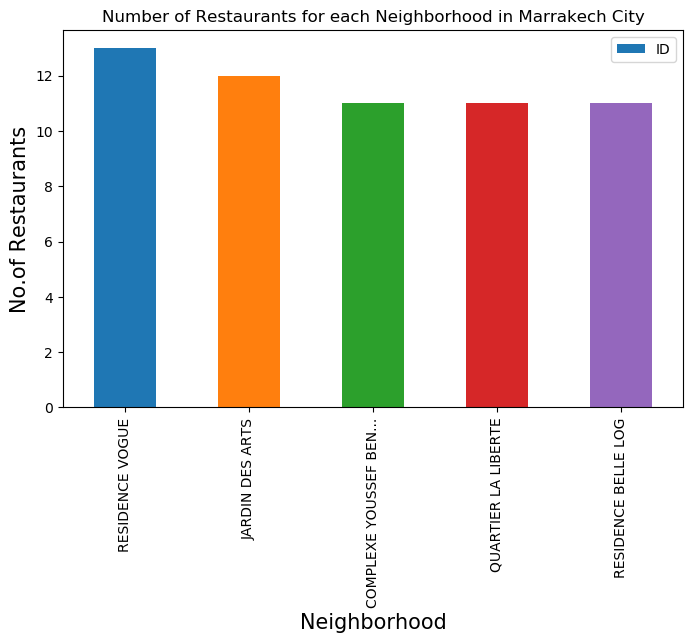

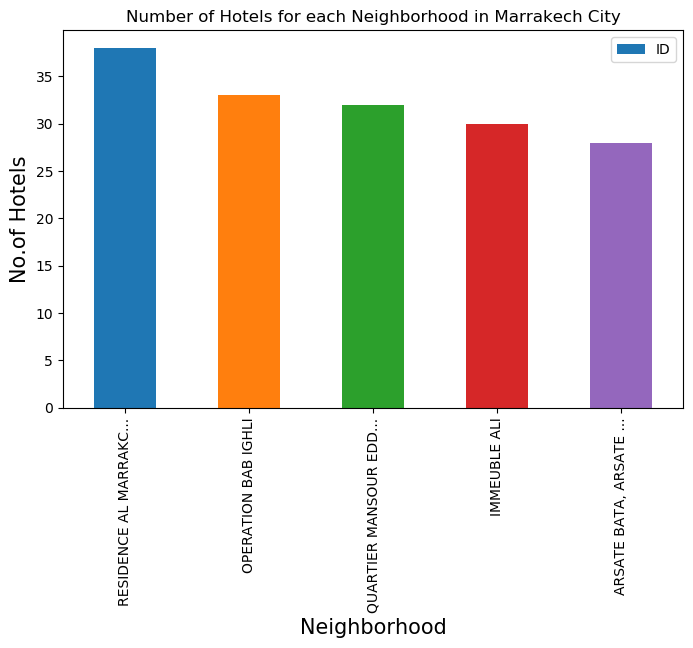

In [75]:
plt.figure(figsize=(8,5), dpi = 100)
# title
plt.title('Number of Restaurants for each Neighborhood in Marrakech City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Restaurants', fontsize=15)
#giving a bar plot
marrakech_vis_r = Marrakech_rests_v
marrakech_vis_r['Neighborhood'] = marrakech_vis_r['Neighborhood'].apply(char_len)
marrakech_vis_r.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

plt.figure(figsize=(8,5), dpi = 100)
# title
plt.title('Number of Hotels for each Neighborhood in Marrakech City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Hotels', fontsize=15)
#giving a bar plot
marrakech_vis_h = Marrakech_hotels_v
marrakech_vis_h['Neighborhood'] = marrakech_vis_h['Neighborhood'].apply(char_len)
marrakech_vis_h.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [76]:
print('No. of restaurants in RESIDENCE VOGUE:',len(Marrakech_rests_v[Marrakech_rests_v['Neighborhood'].str.startswith('RESIDENCE VOGUE')]))

Marrakech_rests_v[Marrakech_rests_v['Neighborhood'].str.startswith('RESIDENCE VOGUE')]

No. of restaurants in RESIDENCE VOGUE: 13


,Neighborhood,Name,ID,Category_Venue
100,RESIDENCE VOGUE,Tipico,4e04cba91495806e9dcabb50,Restaurant
101,RESIDENCE VOGUE,Café-Restaurant Marjana,5022e220e4b0316644a52f16,Restaurant
102,RESIDENCE VOGUE,Sabor Da Avenida,4dcd5664d4c065592f62e854,Restaurant
103,RESIDENCE VOGUE,Esquina Do Côco,4fd26caae4b0cb311e493c22,Restaurant
104,RESIDENCE VOGUE,Líder Bar e Restaurante,4e150bcc1f6e29fb7d4d3305,Restaurant
105,RESIDENCE VOGUE,Griletto,4eb40544be7bfc2849ac12df,Restaurant
106,RESIDENCE VOGUE,Snak Boudaly,50566838e4b0ed8a09233c5a,Restaurant
107,RESIDENCE VOGUE,Kafedaki,52a6544b498e8a025df5f77f,Restaurant
108,RESIDENCE VOGUE,Azyr,5197ef00498e971057aa7cab,Restaurant
109,RESIDENCE VOGUE,Le Trou au Mur,59fba5509411f22d96334c78,Restaurant


In [81]:
print('No. of hotels in RESIDENCE AL MARRAKCHI:',len(Marrakech_hotels_v[Marrakech_hotels_v['Neighborhood'].str.startswith('RESIDENCE AL MARRAKC')]))

Marrakech_hotels_v[Marrakech_hotels_v['Neighborhood'].str.startswith('RESIDENCE AL MARRAKC')]

No. of hotels in RESIDENCE AL MARRAKCHI: 38


,Neighborhood,Name,ID,Category_Venue
833,RESIDENCE AL MARRAKC...,Riad Dyor,4bf93e148d30d13a19dc0118,Hotel
834,RESIDENCE AL MARRAKC...,Riad Palacio De las Especias,5101d79ce4b017638228345a,Hotel
835,RESIDENCE AL MARRAKC...,Palais Dar Donab,4c4325edce54e21ea29f0d1a,Hotel
836,RESIDENCE AL MARRAKC...,Riad Noir d'Ivoire,4cd099ab86cbb7139949fa36,Hotel
837,RESIDENCE AL MARRAKC...,Riad Bindoo,5447ef63498e9539fd634175,Hotel
838,RESIDENCE AL MARRAKC...,Riad Yasmine,4d20b645d7b0b1f79e05179f,Hotel
839,RESIDENCE AL MARRAKC...,Riad Olema & Spa,4ce98e5cfe90a35d4822490e,Hotel
840,RESIDENCE AL MARRAKC...,Dar Soukaina,507d83f0e4b0b250d71db99b,Hotel
841,RESIDENCE AL MARRAKC...,Riad Kniza,4bb37baaeb3e95219f2dcb0a,Hotel
842,RESIDENCE AL MARRAKC...,Dar Attajmil (دار التجميل),4fb7d0e9e4b03c1439d9619d,Hotel


### We can see that, RESIDENCE VOGUE has the highest number of Restaurants with a total count of 13 &
### RESIDENCE AL MARRAKCHI has the highest number of Hotels with a total count of 38

### Analysing Each Neighborhood

In [82]:
# one hot encoding
Marrakech_onehot = pd.get_dummies(Marrakech_venues[['Venue_Category']], prefix="", prefix_sep="")

# add location column back to dataframe
Marrakech_onehot['Neighborhood'] = Marrakech_venues['Neighborhood'] 

# move location column to the first column
fixed_columns = [Marrakech_onehot.columns[-1]] + list(Marrakech_onehot.columns[:-1])
Marrakech_onehot = Marrakech_onehot[fixed_columns]
Marrakech_grouped = Marrakech_onehot.groupby('Neighborhood').mean().reset_index()
Marrakech_onehot.head(5)

,Neighborhood,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Baiano Restaurant,Bakery,Bar,Bathing Area,Bay,Beach,Bed & Breakfast,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Bus Station,Café,Campground,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Country Dance Club,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Duty-free Shop,Electronics Store,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Golf Course,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Lake,Lighthouse,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Moroccan Restaurant,Motel,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Nudist Beach,Other Great Outdoors,Outdoor Event Space,Paella Restaurant,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Plaza,Pool,Print Shop,Pub,Racetrack,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Ski Area,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stables,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Swiss Restaurant,Tailor Shop,Tapas Restaurant,Taxi Stand,Tea Room,Tennis Court,Tennis Stadium,Theater,Theme Park,Theme Park Ride / Attraction,Tour Provider,Tourist Information Center,Trail,Train Station,Travel Agency,Tree,Vegetarian / Vegan Restaurant,Water Park,Waterfall,Wine Bar
0,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [83]:
#We print each neighborhood along with the top 5 most common venues
num_top_venues = 5
for hood in Marrakech_grouped['Neighborhood']:
    print("---- "+char_len(hood, 60)+" ----")
    temp =Marrakech_grouped[Marrakech_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- ABDELLAOUIA, COMPLEXE HABOUS, DAR SAAD, HAY ZAHIA, IMMEUBLE ... ----
                 venue  freq
0                Hotel  0.20
1                 Café  0.15
2     Sushi Restaurant  0.10
3  Moroccan Restaurant  0.10
4         Dessert Shop  0.05


---- ABRAJ EL KOUTOUBIA ----
                  venue  freq
0                  Café   0.6
1            Restaurant   0.2
2           Coffee Shop   0.2
3  Other Great Outdoors   0.0
4   Outdoor Event Space   0.0


---- AFAK, AFAK 1, AFAK 2 ----
                  venue  freq
0                  Café   0.4
1           Coffee Shop   0.2
2  Fast Food Restaurant   0.2
3                Bakery   0.2
4    African Restaurant   0.0


---- AGHBALOU ----
                  venue  freq
0  Herbs & Spices Store   1.0
1    African Restaurant   0.0
2             Pet Store   0.0
3             Nightclub   0.0
4          Nudist Beach   0.0


---- AIN ITTI ----
                 venue  freq
0                Hotel  0.20
1                 Café  0.15
2     Sushi Restaur

                 venue  freq
0                Hotel  0.20
1  Moroccan Restaurant  0.15
2           Restaurant  0.10
3                 Café  0.10
4      Bed & Breakfast  0.10


---- BAB HMR, DERB ABOU EL BANAA, DERB ABOU EL BENNA, DERB AISSAO... ----
                 venue  freq
0                Hotel  0.20
1                 Café  0.15
2     Sushi Restaurant  0.10
3  Moroccan Restaurant  0.10
4         Dessert Shop  0.05


---- BAB LAKHMIS ----
                 venue  freq
0                Hotel  0.35
1  Moroccan Restaurant  0.25
2           Restaurant  0.10
3   African Restaurant  0.05
4                 Café  0.05


---- BAB TAGHZOUT ----
                 venue  freq
0                Hotel  0.35
1  Moroccan Restaurant  0.25
2           Restaurant  0.10
3      Bed & Breakfast  0.10
4               Museum  0.05


---- BEFRA ----
                 venue  freq
0                Hotel  0.20
1                 Café  0.15
2     Sushi Restaurant  0.10
3  Moroccan Restaurant  0.10
4         Desser

4             Pet Store  0.00


---- BLOC D 19 ----
                  venue  freq
0                  Café  0.25
1         Deli / Bodega  0.25
2                 Hotel  0.25
3  Gym / Fitness Center  0.25
4    African Restaurant  0.00


---- BLOC D 2 ----
                venue  freq
0        Soccer Field  0.25
1                 Spa  0.25
2   Martial Arts Dojo  0.25
3                Café  0.25
4  African Restaurant  0.00


---- BLOC D 20 ----
                  venue  freq
0                  Café   0.2
1         Deli / Bodega   0.2
2                Resort   0.2
3                 Hotel   0.2
4  Gym / Fitness Center   0.2


---- BLOC D 21 ----
                  venue  freq
0                  Café   0.2
1         Deli / Bodega   0.2
2                Resort   0.2
3                 Hotel   0.2
4  Gym / Fitness Center   0.2


---- BLOC D 22 ----
                  venue  freq
0            Steakhouse  0.25
1           Coffee Shop  0.25
2  Fast Food Restaurant  0.25
3           Bus Station  0.25
4  

                 venue  freq
0                Hotel  0.25
1  Moroccan Restaurant  0.20
2                 Café  0.15
3      Bed & Breakfast  0.10
4           Restaurant  0.05


---- DAR ADMANA ----
                       venue  freq
0                      Hotel  0.40
1                       Café  0.10
2                     Resort  0.10
3                  Nightclub  0.05
4  Middle Eastern Restaurant  0.05


---- DAR LAMIA ----
                 venue  freq
0               Resort  0.33
1            Nightclub  0.33
2  Outdoor Event Space  0.33
3               Museum  0.00
4          Music Venue  0.00


---- DAR SAADA, IMMEUBLE SAADA 2, LOTISSEMENT DAR SAADA, OPERATIO... ----
                  venue  freq
0                  Café   1.0
1                Resort   0.0
2             Nightclub   0.0
3          Nudist Beach   0.0
4  Other Great Outdoors   0.0


---- DBAGHE ----
                 venue  freq
0                Hotel  0.45
1  Moroccan Restaurant  0.20
2      Bed & Breakfast  0.15
3     

                   venue  freq
0                 Resort   0.4
1    Rental Car Location   0.2
2        Bed & Breakfast   0.2
3                   Park   0.2
4  Performing Arts Venue   0.0


---- DERB ASSABANE ----
                 venue  freq
0                Hotel  0.30
1  Moroccan Restaurant  0.20
2               Museum  0.10
3               Resort  0.10
4           Restaurant  0.05


---- DERB ASSOULI ----
                 venue  freq
0  Moroccan Restaurant  0.30
1                Hotel  0.15
2         Burger Joint  0.10
3      Bed & Breakfast  0.10
4           Restaurant  0.05


---- DERB AYAD ----
                venue  freq
0          Restaurant  0.25
1          Hotel Pool  0.25
2            Mountain  0.25
3            Tea Room  0.25
4  African Restaurant  0.00


---- DERB AZOUZ ----
                 venue  freq
0  Moroccan Restaurant  0.30
1                Hotel  0.20
2         Burger Joint  0.10
3      Bed & Breakfast  0.10
4               Museum  0.05


---- DERB BA SALEH ----
  

                 venue  freq
0                Hotel  0.39
1  Moroccan Restaurant  0.22
2           Restaurant  0.17
3      Bed & Breakfast  0.11
4               Resort  0.06


---- DERB CADI MBAREK ----
                venue  freq
0               Hotel  0.67
1     Bed & Breakfast  0.33
2  African Restaurant  0.00
3           Pet Store  0.00
4           Nightclub  0.00


---- DERB CAID RASSOU ----
                venue  freq
0               Hotel  0.62
1     Bed & Breakfast  0.38
2  African Restaurant  0.00
3           Pet Store  0.00
4           Nightclub  0.00


---- DERB CHAABA AL OUSTA ----
                venue  freq
0          Restaurant  0.25
1          Hotel Pool  0.25
2            Mountain  0.25
3            Tea Room  0.25
4  African Restaurant  0.00


---- DERB CHAABA FOUKANIA ----
                venue  freq
0          Restaurant  0.25
1          Hotel Pool  0.25
2            Mountain  0.25
3            Tea Room  0.25
4  African Restaurant  0.00


---- DERB CHAABANE ----
    

4               Hostel  0.05


---- DERB DROUJ ----
                 venue  freq
0  Moroccan Restaurant  0.30
1                 Café  0.15
2                Hotel  0.15
3      Bed & Breakfast  0.10
4               Museum  0.05


---- DERB EL AADEL ----
                 venue  freq
0                Hotel  0.50
1      Bed & Breakfast  0.25
2   Italian Restaurant  0.08
3  Moroccan Restaurant  0.08
4               Museum  0.08


---- DERB EL AARABE ----
                venue  freq
0               Hotel   0.6
1     Bed & Breakfast   0.4
2  African Restaurant   0.0
3           Pet Store   0.0
4           Nightclub   0.0


---- DERB EL ARSA, DERB EL ARSA SGHIRA ----
                 venue  freq
0                Hotel  0.62
1  Moroccan Restaurant  0.19
2      Bed & Breakfast  0.12
3        Shopping Mall  0.06
4   African Restaurant  0.00


---- DERB EL ASSAS ----
                  venue  freq
0                  Café   0.8
1                 Hotel   0.2
2    African Restaurant   0.0
3          Nu

                 venue  freq
0  Moroccan Restaurant  0.35
1                Hotel  0.30
2               Resort  0.10
3               Museum  0.05
4         Burger Joint  0.05


---- DERB EL MAADA ----
                 venue  freq
0                Hotel   0.2
1  Moroccan Restaurant   0.2
2                  Spa   0.1
3                 Café   0.1
4      Bed & Breakfast   0.1


---- DERB EL MAAROUFI ----
                 venue  freq
0                Hotel  0.30
1  Moroccan Restaurant  0.25
2      Bed & Breakfast  0.10
3        Historic Site  0.10
4           Restaurant  0.05


---- DERB EL MAKINA ----
                  venue  freq
0                  Café  0.50
1            Restaurant  0.25
2           Coffee Shop  0.25
3  Other Great Outdoors  0.00
4   Outdoor Event Space  0.00


---- DERB EL MANAR ----
                  venue  freq
0                  Café   0.4
1          Soccer Field   0.2
2            Campground   0.2
3                   Spa   0.2
4  Other Great Outdoors   0.0


---- DER

                  venue  freq
0                  Café  0.67
1      Halal Restaurant  0.33
2           Music Venue  0.00
3          Nudist Beach  0.00
4  Other Great Outdoors  0.00


---- DERB HAMRI, DERB HARI ----
                  venue  freq
0                  Café  0.67
1      Halal Restaurant  0.33
2           Music Venue  0.00
3          Nudist Beach  0.00
4  Other Great Outdoors  0.00


---- DERB HANTATA ----
                      venue  freq
0  Bike Rental / Bike Share   0.5
1                      Park   0.5
2                    Museum   0.0
3               Music Venue   0.0
4                 Nightclub   0.0


---- DERB HAOUARA ----
                 venue  freq
0                Hotel  0.25
1  Moroccan Restaurant  0.20
2        Historic Site  0.15
3                 Café  0.15
4            Roof Deck  0.05


---- DERB HARA ----
                 venue  freq
0  Moroccan Restaurant  0.30
1                Hotel  0.15
2                 Café  0.15
3      Bed & Breakfast  0.10
4          

                venue  freq
0          Restaurant  0.25
1               Hotel  0.25
2       Shopping Mall  0.25
3         Gas Station  0.25
4  African Restaurant  0.00


---- DERB LEKBIR ----
                 venue  freq
0  Moroccan Restaurant  0.25
1                Hotel  0.20
2         Burger Joint  0.10
3      Bed & Breakfast  0.10
4                 Café  0.10


---- DERB LEMDERDEB ----
                 venue  freq
0                Hotel  0.45
1               Resort  0.10
2      Bed & Breakfast  0.10
3  Moroccan Restaurant  0.10
4                 Café  0.05


---- DERB LFANID ----
        venue  freq
0  Restaurant  0.12
1         Pub  0.12
2  Hotel Pool  0.12
3       Hotel  0.12
4        Pool  0.12


---- DERB LGASSABA LAKBIR ----
                 venue  freq
0  Moroccan Restaurant  0.35
1                Hotel  0.15
2         Burger Joint  0.10
3      Bed & Breakfast  0.10
4           Restaurant  0.05


---- DERB LGASSABA SGHIR ----
                 venue  freq
0  Moroccan Restauran

             venue  freq
0        Rest Area  0.25
1             Café  0.25
2  Bed & Breakfast  0.25
3      Coffee Shop  0.25
4     Nudist Beach  0.00


---- DERB OULED ZOUBAIR ----
                   venue  freq
0             Restaurant  0.33
1               Mountain  0.33
2               Tea Room  0.33
3     African Restaurant  0.00
4  Performing Arts Venue  0.00


---- DERB OUMHRACHA JNANATE, DOUAR AOURAD, DOUAR BOUMAHRACHA, DOU... ----
                 venue  freq
0                Hotel  0.20
1                 Café  0.15
2     Sushi Restaurant  0.10
3  Moroccan Restaurant  0.10
4         Dessert Shop  0.05


---- DERB RAG JAMAA ----
                  venue  freq
0                  Café  0.46
1                Bakery  0.23
2  Fast Food Restaurant  0.15
3            Restaurant  0.08
4             BBQ Joint  0.08


---- DERB RAGRAGUI ----
                  venue  freq
0                  Café   0.5
1        Clothing Store   0.5
2    African Restaurant   0.0
3  Other Great Outdoors   0.0


                 venue  freq
0                Hotel  0.25
1  Moroccan Restaurant  0.20
2                 Café  0.15
3      Bed & Breakfast  0.10
4                  Spa  0.10


---- DERB SIDI SAID AHENSSAL ----
                 venue  freq
0                Hotel  0.20
1                 Café  0.15
2      Bed & Breakfast  0.15
3  Moroccan Restaurant  0.15
4                  Spa  0.10


---- DERB SIMOUHE, SIMOUHE ----
                 venue  freq
0                Hotel  0.40
1  Moroccan Restaurant  0.25
2      Bed & Breakfast  0.10
3               Resort  0.05
4           Restaurant  0.05


---- DERB SLIMA ----
             venue  freq
0        Rest Area  0.25
1             Café  0.25
2  Bed & Breakfast  0.25
3      Coffee Shop  0.25
4     Nudist Beach  0.00


---- DERB SOUALHA, RESIDENCE SOUALHA ----
                 venue  freq
0                 Café  0.33
1            Rest Area  0.17
2  Arts & Crafts Store  0.17
3          Coffee Shop  0.17
4          Snack Place  0.17


---- DERB SOUIK

                 venue  freq
0                Hotel  0.56
1  Moroccan Restaurant  0.19
2      Bed & Breakfast  0.12
3           Restaurant  0.06
4        Shopping Mall  0.06


---- DERB ZITOUNA, QUARTIER ZITOUNA ----
                venue  freq
0   French Restaurant  0.15
1  Italian Restaurant  0.10
2               Diner  0.10
3              Lounge  0.10
4        Dessert Shop  0.05


---- DERB ZOUAK, ZOUAK ----
                 venue  freq
0                Hotel  0.30
1                 Café  0.20
2  Moroccan Restaurant  0.15
3         Burger Joint  0.05
4               Bistro  0.05


---- DIOUR ECHOUHADA, QUARTIER CHOUHADA II ----
                 venue  freq
0                Hotel  0.35
1  Moroccan Restaurant  0.15
2           Restaurant  0.10
3               Lounge  0.10
4  Japanese Restaurant  0.05


---- DIOUR MARSTANE 1, DIOUR MARSTANE 2 ----
                       venue  freq
0                       Café  0.75
1  Middle Eastern Restaurant  0.25
2                Music Venue  0.00


                       venue  freq
0                       Café   0.8
1  Middle Eastern Restaurant   0.2
2                Music Venue   0.0
3               Nudist Beach   0.0
4       Other Great Outdoors   0.0


---- GROUPE ZERKTOUNI, IMMEUBLE ZERKTOUNI, RESIDENCE ZERKTOUNI ----
                           venue  freq
0                           Café  0.55
1                    Flea Market  0.18
2                     Restaurant  0.09
3  Vegetarian / Vegan Restaurant  0.09
4                    Bus Station  0.09


---- GUELIZ ----
                  venue  freq
0                  Café  0.56
1                Bakery  0.33
2  Fast Food Restaurant  0.11
3    African Restaurant  0.00
4          Nudist Beach  0.00


---- HART SOURA, SOUK SIOUR ----
             venue  freq
0        Rest Area  0.25
1       Hotel Pool  0.25
2  Bed & Breakfast  0.25
3            Hotel  0.25
4        Pet Store  0.00


---- HAY AL FIRDAOUSE ----
                  venue  freq
0                  Café  0.33
1    Italian 

4               Museum  0.05


---- IMMEUBLE AL WARDA ----
                       venue  freq
0                       Café  0.29
1               Soccer Field  0.14
2  Middle Eastern Restaurant  0.14
3                      Diner  0.14
4                Pizza Place  0.14


---- IMMEUBLE ALI ----
                venue  freq
0   French Restaurant  0.30
1  Italian Restaurant  0.15
2                Café  0.10
3               Hotel  0.10
4        Dessert Shop  0.10


---- IMMEUBLE AMAL, IMMEUBLE AMANE 1, IMMEUBLE AMANE 2, IMMEUBLE ... ----
                 venue  freq
0                 Café  0.10
1  Moroccan Restaurant  0.10
2                Hotel  0.10
3             Wine Bar  0.05
4       History Museum  0.05


---- IMMEUBLE AMARA, IMMEUBLE ASSAADA, IMMEUBLE BERRADA, IMMEUBLE... ----
                  venue  freq
0                  Café  0.83
1                 Hotel  0.17
2    African Restaurant  0.00
3          Nudist Beach  0.00
4  Other Great Outdoors  0.00


---- IMMEUBLE ANNOUR, IMMEUBLE

                venue  freq
0                 Spa   0.2
1  Italian Restaurant   0.1
2              Lounge   0.1
3         Golf Course   0.1
4       Historic Site   0.1


---- JNANE BACHIR 1, JNANE BACHIR 2 ----
              venue  freq
0              Café  0.43
1       Tailor Shop  0.14
2             Hotel  0.14
3  Halal Restaurant  0.14
4         BBQ Joint  0.14


---- JNANE BEN CHAGRA, SOUIKA JNANE BEN CHEGRA ----
                 venue  freq
0                Hotel  0.20
1  Moroccan Restaurant  0.20
2                 Café  0.15
3                  Spa  0.10
4      Bed & Breakfast  0.10


---- JNANE BRIKA ----
                  venue  freq
0                  Café  0.22
1                 Hotel  0.22
2                Resort  0.11
3           Pastry Shop  0.11
4  Fast Food Restaurant  0.11


---- JNANE ZONE INDUSTRIEL SIDI GHANEM, QUARTIER INDUSTRIELLE SID... ----
                           venue  freq
0         Furniture / Home Store   0.4
1  Vegetarian / Vegan Restaurant   0.2
2       

---- LOTISSEMENT CADI AYAD ----
                       venue  freq
0                       Café  0.67
1                 Restaurant  0.17
2  Middle Eastern Restaurant  0.17
3         African Restaurant  0.00
4               Nudist Beach  0.00


---- LOTISSEMENT CHOUF AL AYADI ----
                      venue  freq
0                Restaurant  0.33
1                      Café  0.33
2  Bike Rental / Bike Share  0.33
3              Nudist Beach  0.00
4      Other Great Outdoors  0.00


---- LOTISSEMENT DAOUI 1 ----
                venue  freq
0        Soccer Field  0.25
1                 Spa  0.25
2   Martial Arts Dojo  0.25
3                Café  0.25
4  African Restaurant  0.00


---- LOTISSEMENT DAOUI 2 ----
                venue  freq
0        Soccer Field  0.25
1                 Spa  0.25
2   Martial Arts Dojo  0.25
3                Café  0.25
4  African Restaurant  0.00


---- LOTISSEMENT DIOUR MARRAKECH, LOTISSEMENT MBARKA 3, LOTISSEME... ----
                      venue  freq
0    

4           Department Store  0.05


---- LOTISSEMENT MARJANA ----
                venue  freq
0                Café  0.50
1     Airport Service  0.25
2         Pizza Place  0.25
3  African Restaurant  0.00
4        Nudist Beach  0.00


---- LOTISSEMENT MASMOUDI ----
                  venue  freq
0             Rest Area  0.33
1                  Café  0.33
2           Snack Place  0.33
3          Nudist Beach  0.00
4  Other Great Outdoors  0.00


---- LOTISSEMENT MASSIRA ----
                      venue  freq
0                Restaurant  0.33
1                      Café  0.33
2  Bike Rental / Bike Share  0.33
3              Nudist Beach  0.00
4      Other Great Outdoors  0.00


---- LOTISSEMENT MASSIRA 2, LOTISSEMENT MASSIRA 2 A, LOTISSEMENT ... ----
                  venue  freq
0                  Café   0.6
1                 Diner   0.2
2         Shopping Mall   0.2
3    African Restaurant   0.0
4  Other Great Outdoors   0.0


---- LOTISSEMENT MASSIRA 3, LOTISSEMENT MASSIRA 3 A, LOTIS

4   Outdoor Event Space  0.00


---- LOTISSEMENT YASMINE ----
                  venue  freq
0                  Café   0.2
1           Coffee Shop   0.2
2              Pharmacy   0.2
3  Fast Food Restaurant   0.2
4           Bus Station   0.2


---- LOTISSEMENT YASMINE 1 ----
                  venue  freq
0                  Café   0.2
1           Coffee Shop   0.2
2              Pharmacy   0.2
3  Fast Food Restaurant   0.2
4           Bus Station   0.2


---- LOTISSEMENT YASMINE 2 ----
                  venue  freq
0                  Café   0.2
1           Coffee Shop   0.2
2              Pharmacy   0.2
3  Fast Food Restaurant   0.2
4           Bus Station   0.2


---- LOTISSEMENT ZAHIA ----
                 venue  freq
0  Moroccan Restaurant  0.10
1             Boutique  0.10
2                 Café  0.10
3          Flea Market  0.05
4                  Gym  0.05


---- LOTISSEMENT ZAHRA I ----
                 venue  freq
0  Moroccan Restaurant  0.10
1             Boutique  0.10
2      



---- QUARTIER AZLI 2, QUARTIER AZLI SUD ----
              venue  freq
0              Café  0.67
1       Pizza Place  0.17
2  Halal Restaurant  0.17
3         Pet Store  0.00
4      Nudist Beach  0.00


---- QUARTIER BA BRAHIM ----
                      venue  freq
0                Restaurant  0.15
1      Brazilian Restaurant  0.10
2                Art Museum  0.10
3                       Bar  0.05
4  Mediterranean Restaurant  0.05


---- QUARTIER BAB AYLANE, QUARTIER BAB DBAGH, QUARTIER BAB FTEUH,... ----
                 venue  freq
0                Hotel  0.31
1  Moroccan Restaurant  0.19
2      Bed & Breakfast  0.12
3   African Restaurant  0.06
4       History Museum  0.06


---- QUARTIER BAB DOUKKALA ----
                 venue  freq
0                Hotel  0.30
1  Moroccan Restaurant  0.25
2      Bed & Breakfast  0.20
3               Museum  0.05
4                  Spa  0.05


---- QUARTIER BAB HMR ----
                 venue  freq
0                Hotel  0.31
1  Moroccan Resta

                  venue  freq
0  Fast Food Restaurant  0.25
1   Sporting Goods Shop  0.25
2                 Diner  0.25
3                 Hotel  0.25
4             Pet Store  0.00


---- QUARTIER MHAMID, QUARTIER MHAMID 2, QUARTIER MHAMID 3, QUART... ----
                          venue  freq
0                 Grocery Store  0.17
1                 Travel Agency  0.17
2                   Coffee Shop  0.17
3          Fast Food Restaurant  0.17
4  Theme Park Ride / Attraction  0.17


---- QUARTIER RYAD ZITOUNE JDID ----
                 venue  freq
0       Ice Cream Shop  0.15
1                 Café  0.15
2   Italian Restaurant  0.10
3    French Restaurant  0.10
4  Japanese Restaurant  0.05


---- QUARTIER SAKINA, QUARTIER SANAOUBAR, QUARTIER TALMOULKT, QUA... ----
                  venue  freq
0                  Café  0.50
1            Restaurant  0.25
2           Coffee Shop  0.25
3  Other Great Outdoors  0.00
4   Outdoor Event Space  0.00


---- QUARTIER SIDI AAMARA, QUARTIER SIDI MIMO

         venue  freq
0         Café  0.19
1        Hotel  0.19
2  Salad Place  0.06
3    BBQ Joint  0.06
4        Diner  0.06


---- RESIDENCE EL MANAR 10 ----
         venue  freq
0         Café  0.19
1        Hotel  0.19
2  Salad Place  0.06
3    BBQ Joint  0.06
4        Diner  0.06


---- RESIDENCE EL MANAR 2 ----
         venue  freq
0         Café  0.19
1        Hotel  0.19
2  Salad Place  0.06
3    BBQ Joint  0.06
4        Diner  0.06


---- RESIDENCE EL MANAR 4 ----
                venue  freq
0   French Restaurant  0.30
1                Café  0.15
2  Italian Restaurant  0.10
3  Seafood Restaurant  0.10
4        Dessert Shop  0.05


---- RESIDENCE EL MANAR 6 ----
                venue  freq
0                Café   0.4
1          Restaurant   0.2
2                 Gym   0.2
3         Flea Market   0.2
4  African Restaurant   0.0


---- RESIDENCE EL MANAR 7 ----
                       venue  freq
0                       Café  0.36
1  Middle Eastern Restaurant  0.27
2              

                venue  freq
0              Resort   0.6
1                Park   0.2
2          Soup Place   0.2
3  African Restaurant   0.0
4           Nightclub   0.0


---- RESIDENCE MEDINA 4 ----
                venue  freq
0                Café  0.50
1       Burrito Place  0.25
2       Tour Provider  0.25
3  African Restaurant  0.00
4           Pet Store  0.00


---- RESIDENCE MEHDI ----
                  venue  freq
0                  Café  0.29
1           Snack Place  0.14
2        Farmers Market  0.14
3           Coffee Shop  0.14
4  Fast Food Restaurant  0.14


---- RESIDENCE MENARA ----
                 venue  freq
0                Hotel  0.30
1  Moroccan Restaurant  0.15
2           Restaurant  0.10
3    French Restaurant  0.10
4            Nightclub  0.10


---- RESIDENCE MIMOSA ----
                venue  freq
0   French Restaurant  0.20
1                Café  0.15
2               Hotel  0.10
3  Seafood Restaurant  0.10
4        Dessert Shop  0.05


---- RESIDENCE MIRADOR 

                  venue  freq
0                  Café   1.0
1                Resort   0.0
2             Nightclub   0.0
3          Nudist Beach   0.0
4  Other Great Outdoors   0.0


---- RESIDENCE TALAA ----
                 venue  freq
0                Hotel  0.25
1  Moroccan Restaurant  0.25
2           Restaurant  0.10
3      Bed & Breakfast  0.05
4               Hostel  0.05


---- RESIDENCE TALAGHT ----
                venue  freq
0              Resort  0.25
1         Golf Course  0.25
2          Art Museum  0.25
3               Hotel  0.25
4  African Restaurant  0.00


---- RESIDENCE TAMARIS ----
        venue  freq
0       Hotel  0.31
1        Café  0.23
2  Restaurant  0.08
3      Bakery  0.08
4      Resort  0.08


---- RESIDENCE TBIB ----
                venue  freq
0     Bed & Breakfast  0.38
1               Hotel  0.25
2           Rest Area  0.12
3       Historic Site  0.12
4  Italian Restaurant  0.12


---- RESIDENCE TENSIFT II ----
                  venue  freq
0           

                   venue  freq
0    Moroccan Restaurant  0.67
1        Bed & Breakfast  0.33
2     African Restaurant  0.00
3  Performing Arts Venue  0.00
4              Nightclub  0.00


---- UNITE TAMANSOURT ----
                  venue  freq
0                  Café   1.0
1                Resort   0.0
2             Nightclub   0.0
3          Nudist Beach   0.0
4  Other Great Outdoors   0.0


---- UNITE TINMEL ----
                 venue  freq
0   Italian Restaurant  0.15
1    French Restaurant  0.10
2               Lounge  0.10
3  Moroccan Restaurant  0.10
4             Wine Bar  0.05


---- WAHATE SIDI BRAHIM ----
                 venue  freq
0                Hotel  0.20
1  Moroccan Restaurant  0.20
2                 Café  0.15
3      Bed & Breakfast  0.15
4                  Spa  0.10


---- WARDA ----
                       venue  freq
0                       Café  0.29
1               Soccer Field  0.14
2  Middle Eastern Restaurant  0.14
3                      Diner  0.14
4       

In [84]:
#We put that into a pandas dataframe

#First, we write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Most Common venues near Location


In [85]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}the Most Common Venue'.format(ind+1))

locations_venues_sorted = pd.DataFrame(columns=columns)
locations_venues_sorted['Neighborhood'] = Marrakech_grouped['Neighborhood']

for ind in np.arange(Marrakech_grouped.shape[0]):
    locations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Marrakech_grouped.iloc[ind, :], num_top_venues)

locations_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4the Most Common Venue,5the Most Common Venue,6the Most Common Venue,7the Most Common Venue,8the Most Common Venue,9the Most Common Venue,10the Most Common Venue
0,"ABDELLAOUIA, COMPLEXE HABOUS, DAR SAAD, HAY ZA...",Hotel,Café,Moroccan Restaurant,Sushi Restaurant,Dessert Shop,French Restaurant,Bed & Breakfast,Diner,Flea Market,Snack Place
1,ABRAJ EL KOUTOUBIA,Café,Restaurant,Coffee Shop,Farm,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
2,"AFAK, AFAK 1, AFAK 2",Café,Coffee Shop,Bakery,Fast Food Restaurant,Farmers Market,French Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market
3,AGHBALOU,Herbs & Spices Store,Wine Bar,Farmers Market,French Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
4,AIN ITTI,Hotel,Café,Moroccan Restaurant,Sushi Restaurant,Dessert Shop,French Restaurant,Bed & Breakfast,Diner,Flea Market,Snack Place


### K-Means Clustering Approach

In [86]:
# Using K-Means to cluster location into 3 clusters
Marrakech_grouped_clustering = Marrakech_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Marrakech_grouped_clustering)
kmeans.labels_

array([0, 2, 2, ..., 0, 1, 1])

In [87]:
locations_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

Marrakech_merged =marrakech.iloc[:16,:]

# merge Marrakech_grouped with Marrakech_data to add latitude/longitude for each location
Marrakech_merged = Marrakech_merged.join(locations_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [88]:
Marrakech_merged.head()# check the last columns!

,PostalCode,Latitude,Longitude,Neighborhood,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4the Most Common Venue,5the Most Common Venue,6the Most Common Venue,7the Most Common Venue,8the Most Common Venue,9the Most Common Venue,10the Most Common Venue
0,40000,31.514265,-9.769298,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",1.0,Hotel,Restaurant,Café,Bed & Breakfast,Moroccan Restaurant,Coffee Shop,Beach,Breakfast Spot,Roof Deck,Diner
1,40000,31.595138,-7.963173,QUARTIER TARIQ IBNOU ZIAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40000,31.596659,-8.047614,LOTISSEMENT ERRACHIDIA,2.0,Café,Soccer Stadium,Tour Provider,Burrito Place,Farm,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
3,40000,31.603320,-8.003300,RESIDENCE MOUNA,1.0,Nightclub,Art Gallery,Bay,Coffee Shop,Bathing Area,Wine Bar,Fish & Chips Shop,French Restaurant,Food Court,Food & Drink Shop
4,40000,31.604750,-7.971450,"LOTISSEMENT AL MHITA, LOTISSEMENT ALBEK, LOTIS...",1.0,Bike Rental / Bike Share,Restaurant,Café,Deli / Bodega,Fast Food Restaurant,French Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market


### Map of Clusters

In [89]:
Marrakech_merged=Marrakech_merged.dropna()
Marrakech_merged['Cluster_Labels'] = Marrakech_merged.Cluster_Labels.astype(int)

kclusters = 10

#create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=13)

# add a red circle marker to represent Marrakech

folium.features.CircleMarker(
    [latitude_x, longitude_y],
    radius=10,
    color='green',
    popup='MARRAKECH',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Marrakech_merged['Latitude'], 
                                   Marrakech_merged['Longitude'], 
                                   Marrakech_merged['Neighborhood'], 
                                   Marrakech_merged['Cluster_Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


## Examine Clusters

### Cluster1

In [90]:
df1=Marrakech_merged.loc[Marrakech_merged['Cluster_Labels'] == 0,Marrakech_merged.columns[[3] + list(range(5, Marrakech_merged.shape[1]))]]
df1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4the Most Common Venue,5the Most Common Venue,6the Most Common Venue,7the Most Common Venue,8the Most Common Venue,9the Most Common Venue,10the Most Common Venue
7,"LOTISSEMENT SBAIA, LOTISSEMENT SBAIYA, RESIDEN...",Hotel,Historic Site,Moroccan Restaurant,Café,Spa,Comfort Food Restaurant,Motel,Roof Deck,Bed & Breakfast,Wine Bar
10,RESIDENCE HAYAT,Hotel,Moroccan Restaurant,Café,History Museum,Historic Site,Spa,Hostel,Motel,Bed & Breakfast,Wine Bar
11,LOTISSEMENT MOSTAKBAL,Hotel,Moroccan Restaurant,Spa,Historic Site,Café,Motel,Hostel,Bistro,Bed & Breakfast,Tea Room
13,JARDIN PACHA,Hotel,Nightclub,Café,Bar,Italian Restaurant,Middle Eastern Restaurant,French Restaurant,Performing Arts Venue,Pool,Resort
14,QUARTIER MANSOUR EDDAHBI,Hotel,Resort,Café,Middle Eastern Restaurant,Convention Center,Restaurant,Coffee Shop,Performing Arts Venue,Breakfast Spot,Nightclub


### Cluster2

In [91]:
df2=Marrakech_merged.loc[Marrakech_merged['Cluster_Labels'] == 1,Marrakech_merged.columns[[3] + list(range(5, Marrakech_merged.shape[1]))]]
df2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4the Most Common Venue,5the Most Common Venue,6the Most Common Venue,7the Most Common Venue,8the Most Common Venue,9the Most Common Venue,10the Most Common Venue
0,"COMPLEXE YOUSSEF BEN TACHFINE, RESIDENCE YOUSS...",Hotel,Restaurant,Café,Bed & Breakfast,Moroccan Restaurant,Coffee Shop,Beach,Breakfast Spot,Roof Deck,Diner
3,RESIDENCE MOUNA,Nightclub,Art Gallery,Bay,Coffee Shop,Bathing Area,Wine Bar,Fish & Chips Shop,French Restaurant,Food Court,Food & Drink Shop
4,"LOTISSEMENT AL MHITA, LOTISSEMENT ALBEK, LOTIS...",Bike Rental / Bike Share,Restaurant,Café,Deli / Bodega,Fast Food Restaurant,French Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market
6,DERB ZAHRA I,Hotel Pool,Restaurant,Tea Room,Mountain,Fast Food Restaurant,French Restaurant,Food Court,Food & Drink Shop,Flower Shop,Flea Market
9,IMMEUBLE HAJ BRAHIM,Café,Snack Place,Rest Area,Coffee Shop,Arts & Crafts Store,Wine Bar,Food & Drink Shop,Flower Shop,Flea Market,Fish Market


### Cluster3

In [92]:
df3=Marrakech_merged.loc[Marrakech_merged['Cluster_Labels'] == 2,Marrakech_merged.columns[[3] + list(range(5, Marrakech_merged.shape[1]))]]
df3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4the Most Common Venue,5the Most Common Venue,6the Most Common Venue,7the Most Common Venue,8the Most Common Venue,9the Most Common Venue,10the Most Common Venue
2,LOTISSEMENT ERRACHIDIA,Café,Soccer Stadium,Tour Provider,Burrito Place,Farm,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
8,IMMEUBLE MESSOUADI,Café,Pizza Place,Burger Joint,Farmers Market,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop
12,LOTISSEMENT SAADIA,Café,Restaurant,Flea Market,Gym,Farm,Food Court,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop
15,IMMEUBLE BEN ABDELLAH,Café,Halal Restaurant,Wine Bar,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [98]:
Marrakech_Avg_HotelPrice=pd.DataFrame({"Neighborhood":Marrakech_hotels_v["Neighborhood"],
                                      "Average_Hotel_Price":[72.26, 89.48, 76.47, 94.6, 72.78, 93.74, 33.29, 29.04, 32.05, 52.92, 47.92, 36.59, 27.53, 32.18, 59.56, 53.8, 38.72, 39.24, 27.28, 63.25, 68.29, 82.76, 78.21, 33.1, 82.98, 57.29, 36.85, 67.53, 53.91, 32.14, 67.74, 27.83, 62.41, 93.48, 42.81, 70.94, 73.72, 65.18, 80.39, 40.25, 31.39, 69.1, 79.75, 90.34, 71.96, 78.38, 79.32, 49.67, 26.88, 35.93, 66.05, 37.54, 67.35, 97.52, 77.25, 57.78, 74.72, 46.5, 77.22, 83.61, 35.48, 64.22, 83.13, 69.94, 35.06, 98.68, 67.34, 30.01, 83.81, 44.99, 82.32, 52.57, 72.98, 35.28, 43.73, 49.64, 31.7, 47.07, 46.54, 33.49, 80.5, 66.83, 59.26, 95.08, 64.4, 90.38, 47.54, 95.57, 60.59, 35.25, 71.91, 89.36, 39.54, 46.47, 34.38, 57.05, 61.98, 27.51, 82.99, 84.42, 60.25, 34.46, 28.21, 60.87, 51.45, 71.34, 65.99, 43.68, 96.96, 36.92, 45.27, 92.55, 92.08, 57.81, 60.18, 36.54, 43.62, 93.25, 59.12, 68.49, 43.14, 89.96, 47.31, 67.29, 70.85, 66.57, 81.14, 52.05, 65.89, 85.82, 39.69, 73.48, 48.25, 55.75, 93.93, 47.24, 25.65, 83.38, 54.29, 51.09, 56.32, 52.01, 69.71, 72.15, 63.39, 53.93, 73.75, 80.85, 74.68, 76.0, 82.49, 78.11, 52.37, 94.4, 50.67, 40.41, 84.52, 33.01, 68.95, 51.52, 38.44, 31.32, 78.91, 73.87, 49.23, 71.12, 33.23, 84.89, 31.3, 41.58, 92.73, 84.28, 59.11, 37.84, 66.18, 90.29, 40.82, 44.95, 63.08, 41.88, 46.22, 91.29, 70.35, 38.66, 94.98, 46.16, 55.79, 42.68, 50.37, 86.44, 64.18, 55.12, 47.17, 98.47, 88.6, 70.63, 55.47, 41.24, 40.21, 93.54, 53.15, 83.65, 46.87, 86.8, 64.14, 65.86, 31.08, 62.71, 67.38, 37.31, 84.64, 61.89, 31.76, 35.01, 25.2, 57.22, 98.35, 25.3, 62.84, 72.22, 55.3, 53.4, 86.41, 55.97, 57.43, 39.07, 85.13, 27.58, 95.75, 57.37, 72.76, 57.68, 86.12, 28.06, 94.92, 32.19, 89.78, 40.6, 49.41, 55.41, 52.07, 51.32, 77.58, 65.68, 28.67, 54.64, 65.69, 77.76, 70.79, 71.66, 28.12, 58.76, 33.12, 28.65, 71.49, 57.25, 29.0, 97.45, 36.21, 25.69, 52.25, 98.51, 62.24, 93.88, 43.36, 48.93, 57.47, 93.66, 64.95, 80.21, 25.94, 39.51, 44.48, 47.42, 62.29, 91.67, 84.83, 92.9, 54.96, 30.24, 87.97, 34.68, 71.69, 25.82, 86.93, 74.4, 30.99, 42.18, 34.32, 75.38, 92.09, 43.11, 34.56, 76.26, 64.77, 83.11, 79.41, 93.27, 46.61, 95.97, 27.07, 75.37, 93.95, 85.58, 25.96, 40.68, 27.1, 55.31, 80.55, 40.49, 38.54, 74.7, 64.52, 26.75, 75.49, 55.56, 44.38, 61.54, 60.67, 59.28, 67.24, 63.49, 98.92, 36.72, 73.5, 39.02, 25.9, 30.65, 94.28, 75.67, 40.24, 78.76, 77.43, 99.43, 97.61, 86.48, 73.83, 68.67, 39.14, 47.04, 45.32, 38.51, 67.47, 39.71, 46.62, 86.08, 91.09, 33.53, 58.66, 35.73, 70.27, 61.02, 55.49, 98.86, 60.33, 30.39, 85.8, 63.37, 62.18, 39.53, 98.11, 63.52, 39.09, 62.82, 88.11, 67.86, 71.75, 70.72, 85.5, 36.55, 36.75, 66.3, 28.26, 83.05, 89.22, 37.14, 42.72, 96.19, 51.87, 91.87, 59.34, 79.09, 50.42, 31.44, 31.22, 70.99, 61.59, 88.04, 71.5, 75.98, 85.4, 69.47, 86.62, 67.2, 27.08, 69.03, 80.88, 89.0, 96.75, 68.86, 64.62, 75.18, 62.25, 44.69, 90.92, 49.89, 52.52, 69.54, 60.08, 47.87, 38.89, 43.5, 88.34, 65.12, 92.61, 87.61, 91.11, 32.56, 54.43, 73.38, 26.62, 89.2, 95.14, 29.37, 28.47, 56.0, 85.99, 55.92, 25.42, 87.37, 81.78, 88.24, 86.05, 80.83, 87.19, 96.23, 79.69, 79.26, 66.99, 30.64, 32.41, 80.73, 95.7, 71.74, 90.83, 65.36, 36.88, 41.93, 48.62, 43.38, 95.06, 27.81, 66.73, 75.79, 89.3, 46.57, 73.96, 55.44, 43.85, 91.14, 86.28, 35.5, 66.35, 95.85, 51.19, 95.92, 37.1, 33.8, 87.0, 93.55, 97.78, 43.33, 32.17, 64.75, 46.14, 41.82, 91.43, 47.55, 46.6, 45.78, 56.52, 74.73, 39.55, 60.22, 93.84, 63.99, 50.34, 33.91, 85.79, 25.22, 82.24, 56.65, 72.54, 83.22, 59.17, 99.11, 77.39, 68.22, 25.24, 44.94, 33.79, 56.81, 70.6, 85.87, 87.86, 38.31, 58.01, 61.12, 46.56, 79.12, 51.48, 59.55, 72.87, 67.97, 38.76, 54.79, 91.48, 66.89, 29.75, 28.25, 99.62, 65.09, 40.34, 39.96, 78.08, 72.35, 58.48, 93.1, 33.13, 85.2, 82.87, 72.53, 38.8, 74.17, 33.25, 91.91, 34.9, 62.51, 35.6, 78.19, 47.15, 43.91, 55.72, 94.69, 98.06, 50.57, 60.45, 68.91, 27.89, 86.31, 40.93, 43.72, 52.99, 39.22, 53.23, 96.05, 32.6, 56.38, 62.57, 73.31, 62.26, 78.25, 66.74, 35.89, 51.18, 28.5, 57.67, 29.87, 43.07, 32.02, 85.38, 83.74, 66.03, 69.65, 52.11, 96.57, 56.29, 38.95, 80.59, 62.85, 29.34, 39.92, 35.41, 74.24, 46.35, 26.82, 60.31, 69.3, 66.16, 85.56, 84.3, 34.79, 88.09, 29.97, 51.57, 84.11, 52.42, 26.46, 49.83, 37.27, 45.48, 48.33, 33.02, 71.59, 50.93, 88.69, 31.67, 66.21, 49.63, 47.74, 61.5, 74.3, 78.43, 53.27, 34.1, 26.02, 79.83, 26.74, 81.41, 48.87, 95.69, 90.68, 42.15, 59.36, 35.94, 67.78, 97.43, 38.74, 67.49, 84.66, 58.33, 32.52, 30.59, 80.49, 93.72, 96.39, 49.77, 39.62, 38.35, 43.87, 87.29, 70.59, 74.01, 99.5, 27.24, 47.05, 82.89, 42.9, 66.29, 81.31, 33.69, 65.14, 86.52, 83.03, 46.09, 47.0, 82.35, 80.9, 68.32, 74.64, 65.85, 30.3, 41.63, 66.02, 60.71, 85.52, 36.84, 42.8, 97.18, 87.79, 97.85, 53.49, 77.15, 64.74, 45.62, 92.41, 27.33, 34.08, 29.92, 34.02, 57.33, 90.71, 66.33, 41.08, 61.48, 63.67, 96.03, 69.62, 71.44, 47.94, 85.65, 79.03, 94.46, 38.73, 99.21, 67.67, 69.79, 38.53, 87.45, 29.56, 95.01, 59.16, 96.84, 62.66, 53.95, 93.58, 33.03, 44.02, 33.32, 43.13, 61.31, 51.94, 68.7, 66.09, 31.92, 93.57, 38.07, 61.62, 41.2, 52.19, 61.96, 72.48, 70.17, 51.58, 53.83, 33.18, 37.69, 28.55, 98.6, 34.54, 31.43, 49.27, 37.43, 42.51, 92.04, 96.62, 63.06, 49.22, 73.66, 50.63, 78.49, 37.56, 90.5, 78.94, 76.96, 42.76, 97.82, 61.23, 47.49, 93.76, 67.88, 64.24, 39.21, 86.51, 71.26, 49.52, 69.16, 46.92, 70.44, 91.21, 29.74, 57.31, 27.41, 59.6, 43.39, 31.6, 88.59, 82.04, 54.75, 32.37, 96.22, 66.45, 78.31, 49.58, 96.18, 27.93, 71.79, 98.95, 65.56, 63.62, 84.65, 79.95, 26.11, 69.11, 53.51, 91.86, 82.92, 93.69, 53.89, 43.26, 29.18, 74.42, 44.26, 56.45, 29.27, 67.63, 36.99, 93.33, 59.2, 73.59, 65.78, 39.6, 74.47, 32.97, 90.59, 49.56, 54.11, 75.51, 33.99, 64.09, 82.77, 33.05, 78.98, 25.57, 81.19, 39.38, 94.18, 97.13, 94.17, 53.97, 35.09, 54.0, 45.36, 69.9, 96.7, 73.09, 68.89, 81.86, 86.5, 90.24, 99.85, 71.16, 37.18, 79.79, 93.81, 38.96, 59.31, 83.77, 26.52, 45.92, 77.2, 90.88, 88.57, 67.57, 98.83, 71.63, 79.58, 87.22, 70.5, 46.18, 44.04, 80.52, 85.3, 77.8, 67.02, 67.9, 88.03, 28.29, 67.89, 90.3, 70.26, 92.7, 26.15, 62.33, 92.66, 32.01, 47.3, 70.02, 94.07, 31.52, 40.31, 51.96, 53.25, 48.23, 60.23, 69.39, 66.4, 60.74, 56.97, 43.43, 91.17, 71.97, 75.54, 54.23, 82.7, 35.27, 79.25, 40.42, 69.6, 45.59, 76.17, 28.71, 46.01, 27.8, 57.79, 87.67, 87.21, 46.0, 51.73, 62.09, 32.26, 82.02, 52.31, 81.23, 86.02, 86.01, 34.73, 80.93, 54.36, 57.19, 37.66, 54.84, 64.3, 42.74, 36.2, 49.14, 36.16, 65.19, 83.53, 81.55, 80.1, 80.12, 59.61, 78.59, 37.77, 83.17, 52.81, 88.92, 48.84, 52.58, 67.17, 51.5, 54.45, 26.5, 76.25, 37.76, 33.31, 73.23, 85.31, 87.94, 59.45, 31.15, 37.83, 78.99, 83.39, 39.76, 39.01, 85.06, 62.52, 64.78, 66.67, 74.92, 90.81, 74.39, 38.45, 83.48, 90.96, 99.32, 37.05, 65.72, 45.86, 35.54, 68.15, 41.42, 67.48, 75.66, 59.65, 99.18, 48.31, 35.77, 42.35, 26.42, 81.2, 86.3, 37.06, 30.04, 89.99, 87.82, 75.55, 32.25, 79.39, 58.63, 95.81, 63.1, 64.19, 49.7, 33.56, 64.57, 58.68, 32.06, 30.94, 47.44, 43.29, 83.42, 50.1, 88.25, 25.4, 83.9, 81.58, 53.98, 64.34, 70.37, 87.36, 33.9, 69.15, 52.65, 41.64, 42.43, 74.18, 28.17, 71.04, 33.11, 88.86, 43.59, 35.74, 66.1, 31.07, 86.7, 40.58, 89.1, 85.26, 99.41, 79.88, 47.39, 93.44, 63.34, 71.72, 51.61, 42.27, 74.05, 28.93, 28.61, 48.13, 28.97, 91.02, 69.77, 51.71, 71.43, 36.22, 43.18, 81.89, 82.52, 34.4, 52.7, 73.82, 95.9, 28.41, 93.49, 58.75, 77.35, 91.96, 42.93, 53.84, 63.28, 76.05, 98.3, 72.65, 52.03, 33.77, 67.25, 77.9, 92.32, 71.84, 25.05, 97.71, 66.81, 97.87, 68.11, 43.74, 91.55, 97.4, 30.95, 66.26, 85.25, 72.82, 99.87, 35.03, 48.14, 79.15, 60.54, 25.13, 56.67, 81.96, 83.59, 44.65, 46.38, 71.18, 48.76, 99.97, 75.63, 39.82, 45.37, 77.64, 79.13, 58.24, 98.94, 76.46, 30.76, 25.91, 31.45, 38.3, 28.52, 88.08, 56.51, 88.89, 63.05, 63.59, 66.65, 56.8, 51.99, 90.27, 83.37, 76.2, 81.84, 51.4, 49.88, 53.58, 66.58, 98.96, 76.42, 87.27, 56.79, 94.32, 88.91, 29.58, 97.97, 64.42, 64.07, 29.93, 95.48, 85.34, 50.85, 97.17, 28.54, 43.51, 54.99, 83.06, 83.54, 83.85, 88.81, 81.5, 74.96, 76.15, 62.46, 25.08, 76.87, 26.03, 33.09, 82.6, 58.38, 81.51, 35.84, 62.21, 69.09, 30.42, 45.19, 42.21, 78.57, 37.32, 82.65, 42.3, 52.14, 71.28, 81.29, 49.21, 64.92, 69.17, 49.61, 32.77, 68.65, 61.32, 47.95, 93.28, 67.85, 96.51, 45.63, 52.61, 33.68, 55.22, 65.95, 79.5, 46.52, 50.16, 82.93, 37.38, 38.75, 65.29, 34.94, 34.45, 35.85, 46.72, 95.51, 85.71, 87.49, 41.96, 41.04, 33.76, 38.36, 65.47, 38.78, 95.88, 40.89, 61.78, 38.83, 38.58, 77.05, 74.22, 66.93, 73.28, 44.44, 61.91, 82.43, 38.84, 38.17, 88.49, 96.29, 29.08, 97.44, 83.92, 47.86, 58.73, 88.77, 79.64, 74.77, 88.38, 92.15, 67.33, 97.39, 68.12, 52.24, 50.47, 70.11, 77.18, 81.64, 50.04, 90.84, 48.49, 49.65, 61.39, 91.97, 72.03, 64.23, 43.67, 41.27, 37.59, 48.43, 98.62, 76.32, 34.62, 44.55, 31.85, 88.28, 91.5, 69.36, 26.13, 32.74, 39.63, 47.37, 37.09, 73.4, 35.68, 36.51, 80.26, 55.84, 89.54, 73.55, 27.78, 63.63, 48.55, 55.88, 26.07, 29.86, 50.31, 96.8, 56.46, 78.03, 44.46, 43.4, 93.22, 80.79, 84.69, 25.79, 74.57, 65.6, 93.38, 52.26, 91.7, 89.16, 75.8, 43.8, 96.16, 34.11, 48.75, 60.5, 90.53, 92.88, 90.73, 58.2, 93.7, 64.88, 32.9, 99.74, 89.58, 38.42, 41.9, 57.55, 27.84, 93.64, 31.1, 79.27, 67.01, 67.19, 29.63, 48.72, 50.11, 25.14, 29.62, 36.57, 89.05, 68.31, 41.49, 51.85, 52.63, 82.78, 77.63, 60.55, 79.84, 33.06, 86.43, 93.12, 62.99, 93.59, 77.29, 81.73, 39.86, 41.75, 57.13, 35.42, 71.7, 85.95, 46.11, 30.81, 46.93, 87.98, 54.73, 57.28, 97.83, 64.93, 31.8, 59.49, 66.08, 60.1, 51.2, 53.44, 68.56, 84.53, 57.46, 86.06, 63.88, 94.34, 98.74, 61.67, 69.44, 62.0, 71.07, 98.36, 96.89, 73.08, 72.49, 34.99, 99.47, 60.3, 30.19, 44.57, 66.79, 36.97, 50.51, 57.08, 60.68, 77.48, 83.66, 32.96, 25.81, 96.14, 59.1, 56.59, 95.2, 82.63, 54.12, 82.29, 73.12, 70.14, 81.01, 57.52, 80.66, 44.82, 33.58, 25.27, 64.63, 45.58, 73.7, 94.57, 92.33, 87.95, 97.75, 91.4, 61.19, 46.91, 91.84, 92.68, 79.19, 38.11, 33.93, 96.2, 42.94, 47.93, 98.5, 28.75, 47.97, 83.19, 36.91, 34.43, 66.43, 61.64, 57.03, 52.38, 32.11, 74.78, 88.67, 97.56, 40.2, 94.72, 63.73, 35.44, 25.49, 91.22, 41.28, 26.45, 33.66, 75.1, 89.67, 55.8, 54.41, 94.49, 40.55, 90.47, 44.36, 50.76, 38.9, 36.64, 46.83, 67.52, 38.24, 74.61, 93.3, 74.04, 59.9, 29.95, 47.72, 77.62, 50.82, 77.54, 42.57, 60.76, 72.33, 57.62, 93.98, 77.07, 87.62, 47.9, 87.59, 87.48, 53.66, 36.96, 92.99, 89.27, 54.7, 75.75, 41.12, 68.77, 65.3, 35.8, 70.87, 95.22, 40.08, 52.5, 39.94, 93.51, 29.44, 84.97, 78.0, 75.35, 29.1, 48.34, 73.37, 53.63, 84.73, 53.74, 72.56, 84.72, 34.33, 89.68, 36.3, 57.14, 37.79, 80.81, 55.06, 76.02, 70.71, 62.58, 88.71, 80.13, 87.77, 88.51, 92.78, 32.68, 38.39, 32.22, 77.83, 77.21, 26.85, 93.14, 41.41, 44.51, 78.39, 35.75, 75.5, 68.54, 82.41, 25.87, 97.06, 61.57, 99.44, 56.37, 81.54, 75.09, 37.73, 66.68, 86.22, 82.88, 48.57, 84.24, 83.1, 67.08, 65.48, 92.45, 59.4, 90.86, 47.59, 33.86, 91.76, 55.95, 32.91, 50.77, 96.43, 45.13, 94.71, 51.78, 54.39, 98.19, 39.27, 37.24, 58.55, 93.37, 55.99, 43.02, 39.11, 61.3, 42.98, 92.59, 54.97, 71.33, 43.9, 77.78, 95.31, 77.36, 78.45, 25.01, 96.66, 77.04, 84.74, 47.67, 46.48, 25.62, 41.97, 95.46, 77.65, 66.84, 29.53, 89.46, 25.93, 57.56, 95.17, 76.5, 46.04, 74.54, 88.96, 31.5, 39.88, 85.55, 44.68, 32.54, 57.1, 59.25, 75.96, 25.64, 27.9, 86.85, 70.83, 41.78, 42.0, 36.67, 46.97, 73.52, 97.63, 90.57, 95.84, 75.89, 53.09, 95.66, 85.77, 57.71, 63.16, 42.85, 75.59, 31.56, 36.73, 35.39, 55.85, 46.77, 81.26, 89.89, 27.59, 85.51, 35.21, 36.23, 48.99, 35.46, 84.08, 70.41, 50.53, 43.56, 80.03, 99.75, 50.2, 50.41, 73.14, 45.74, 96.5, 35.55, 99.05, 60.24, 55.08, 79.44, 59.73, 37.62, 76.56, 29.13, 45.22, 39.9, 80.08, 96.91, 88.85, 34.61, 97.15, 29.25, 52.2, 27.75, 92.34, 78.51, 61.61, 90.74, 52.74, 34.21, 50.23, 51.37, 95.36, 64.2, 60.53, 48.88, 26.53, 44.18, 43.61, 66.46, 56.54, 81.59, 49.1, 45.47, 59.67, 76.14, 72.21, 27.64, 87.39, 86.34, 72.99, 81.72, 69.56, 32.94, 90.77, 42.37, 82.28, 40.99, 82.03, 70.28, 30.54, 70.09, 88.99, 95.79, 83.75, 63.66, 87.74, 72.8, 38.32, 41.44, 86.17, 32.63, 48.2, 98.48, 61.34, 91.18, 39.67, 37.65, 77.3, 45.9, 95.1, 69.28, 48.97, 38.03, 66.38, 87.78, 27.4, 80.28, 75.76, 84.43, 48.37, 89.92, 55.87, 81.48, 52.32, 28.7, 76.92, 57.2, 94.86, 90.01, 46.44, 50.89, 93.68, 83.6, 72.89, 60.47, 51.36, 51.01, 99.06, 34.8, 56.63, 45.31, 38.27, 83.71, 64.31, 50.92, 70.07, 45.6, 38.5, 84.18, 49.19, 59.07, 51.6, 38.43, 85.44, 86.66, 92.71, 78.4, 98.69, 96.34, 33.98, 82.72, 72.96, 28.35, 43.28, 29.69, 95.32, 88.65, 47.75, 65.44, 58.95, 91.54, 29.7, 40.46, 88.4, 48.29, 83.02, 36.95, 49.99, 58.62, 68.82, 46.63, 89.01, 76.19, 59.99, 99.4, 31.79, 78.69, 29.46, 80.07, 52.45, 46.7, 31.95, 60.12, 80.61, 36.05, 69.68, 87.03, 40.57, 26.87, 96.69, 74.27, 51.33, 31.19, 88.53, 82.14, 65.94, 84.33, 39.84, 33.94, 94.08, 31.58, 61.52, 74.32, 49.43, 89.47, 59.21, 65.63, 97.95, 61.14, 88.44, 76.53, 27.86, 41.43, 65.26, 85.9, 81.88, 72.63, 28.6, 84.31, 28.03, 80.3, 66.13, 48.3, 30.84, 65.73, 53.12, 73.34, 75.71, 32.82, 88.45, 28.34, 63.24, 95.99, 79.56, 29.81, 86.38, 58.69, 35.61, 30.22, 49.09, 63.07, 81.09, 75.95, 73.47, 69.89, 80.71, 46.88, 34.41, 48.64, 50.78, 89.76, 83.24, 80.68, 44.9, 81.03, 77.82, 44.87, 46.17, 42.92, 72.61, 26.35, 69.42, 76.59, 59.54, 69.41, 75.57, 63.32, 77.32, 79.96, 40.78, 97.02, 39.04, 35.82, 30.09, 70.58, 97.19, 70.05, 45.23, 36.36, 28.78, 43.94, 43.49, 65.15, 68.81, 71.86, 79.42, 28.89, 73.94, 30.29, 69.74, 67.82, 66.64, 44.88, 44.37, 68.43, 90.15, 33.85, 57.23, 37.01, 84.17, 73.43, 85.85, 26.29, 91.08, 53.06, 84.77, 85.05, 89.14, 58.18, 84.41, 70.32, 29.12, 33.46, 30.58, 32.61, 81.67, 94.9, 84.82, 40.5, 27.46, 74.0, 98.14, 77.11, 28.11, 57.53, 31.46, 87.56, 55.04, 49.97, 90.48, 98.99, 99.92, 72.34, 55.68, 93.53, 41.54, 97.59, 33.17, 28.15, 80.63, 47.51, 80.86, 51.91, 43.89, 32.0, 57.18, 25.35, 60.64, 87.02, 60.7, 66.59, 27.99, 64.38, 91.66, 35.37, 32.29, 52.51, 48.02, 93.89, 87.14, 88.98, 48.32, 73.3, 92.3, 65.46, 69.0, 78.46, 81.99, 38.2, 95.65, 49.71, 94.95, 93.35, 70.82, 47.76, 98.63, 29.71, 83.41, 33.95, 83.23, 58.36, 88.84, 86.16, 85.02, 52.77, 27.32, 34.26, 61.0, 69.24, 63.9, 63.54, 76.11, 49.44, 65.24, 27.91, 73.9, 45.49, 64.25, 33.21, 44.2, 98.05, 75.08, 52.15, 33.71, 32.57, 63.75, 61.43, 66.2, 42.58, 88.56, 28.44, 93.79, 60.36, 27.06, 44.61, 64.87, 62.36, 44.15, 56.49, 71.87, 99.04, 50.09, 29.01, 26.64, 98.09, 53.53, 65.62, 91.83, 78.93, 81.07, 69.7, 85.39, 59.37, 45.91, 90.28, 51.0, 31.13, 29.32, 81.1, 95.09, 40.56, 45.35, 32.13, 92.48, 92.86, 74.69, 67.95, 50.28, 97.21, 30.92, 84.92, 78.73, 87.96, 70.4, 84.44, 30.36, 57.92, 75.82, 93.15, 53.19, 48.51, 63.94, 34.88, 63.83, 89.45, 43.46, 65.84, 55.67, 49.69, 89.86, 76.85, 80.32, 50.75, 63.92, 69.19, 96.17, 44.53, 26.27, 31.25, 32.04, 73.67, 35.16, 44.4, 90.52, 76.86, 86.65, 79.23, 66.96, 73.01, 34.14, 32.73, 85.63, 97.46, 80.2, 60.52, 72.11, 77.74, 35.32, 42.12, 62.64, 59.3, 80.54, 69.83, 32.72, 58.77, 88.14, 96.11, 85.04, 62.76, 51.47, 43.45, 80.57, 57.64, 62.87, 60.07, 88.27, 50.22, 88.75, 26.47, 62.34, 75.01, 77.85, 53.68, 82.59, 42.33, 34.09, 28.83, 67.14, 53.52, 55.6, 70.38, 99.86, 83.55, 90.93, 86.19, 25.34, 93.47, 33.55, 42.08, 56.85, 64.96, 45.99, 88.39, 76.1, 93.85, 54.16, 80.96, 89.28, 29.23, 36.01, 81.49, 77.79, 89.43, 36.45, 49.55, 48.24, 87.89, 94.13, 45.71, 37.95, 92.82, 57.83, 81.66, 31.42, 41.59, 68.17, 82.61, 47.99, 43.76, 61.83, 76.7, 82.95, 78.14, 39.42, 97.76, 29.51, 50.62, 88.97, 59.27, 34.64, 29.61, 58.46, 59.06, 84.07, 70.86, 46.58, 37.94, 28.04, 37.25, 85.6, 72.2, 35.2, 72.84, 45.28, 44.6, 55.23, 94.73, 87.38, 73.8, 80.4, 69.22, 84.01, 69.12, 47.52, 91.56, 90.89, 43.48, 60.43, 58.11, 57.48, 78.5, 29.57, 84.15, 50.91, 84.62, 36.34, 70.3, 55.4, 51.16, 98.81, 62.14, 89.12, 30.1, 90.63, 64.76, 96.82, 49.35, 91.52, 40.36, 78.1, 72.88, 47.34, 54.27, 82.05, 50.68, 43.42, 64.68, 56.25, 86.83, 73.11, 60.92, 59.77, 43.95, 68.9, 72.41, 73.88, 79.18, 38.28, 95.02, 36.76, 85.67, 33.26, 80.02, 78.66, 86.89, 94.87, 75.87, 46.98, 73.16, 76.54, 89.85, 77.88, 83.87, 94.25, 88.52, 77.75, 63.33, 71.3, 72.77, 75.94, 32.64, 59.95, 56.56, 94.47, 95.13, 99.9, 50.14, 49.92, 65.38, 61.09, 79.87, 63.56, 71.0, 47.58, 97.38, 99.69, 49.46, 99.25, 80.43, 77.81, 28.56, 93.39, 42.23, 70.1, 82.01, 35.72, 75.33, 42.29, 93.11, 74.76, 96.38, 80.22, 50.5, 55.52, 69.73, 81.98, 54.07, 39.52, 87.99, 53.28, 84.94, 52.09, 42.91, 64.72, 78.48, 83.72, 80.23, 80.64, 60.94, 52.46, 36.9, 40.39, 88.42, 40.92, 99.65, 44.13, 93.05, 54.57, 86.77, 74.94, 70.64, 56.73, 91.32, 92.72, 44.7, 35.92, 58.31, 89.26, 72.32, 54.95, 76.98, 52.48, 38.01, 97.54, 57.38, 49.05, 95.39, 72.19, 90.9, 33.64, 91.13, 67.54, 66.52, 29.98, 66.41, 54.88, 47.77, 79.0, 43.17, 70.18, 27.79, 37.22, 26.06, 69.96, 56.62, 88.68, 71.13, 49.25, 98.28, 98.59, 56.14, 33.39, 58.92, 53.62, 62.95, 86.95, 63.85, 77.92, 69.51, 45.57, 91.88, 50.27, 28.48, 84.5, 58.79, 46.29, 26.65, 46.78, 85.09, 66.55, 83.91, 65.7, 39.65, 95.93, 93.83, 58.34, 50.21, 69.92, 59.68, 85.96, 97.64, 76.95, 71.94, 86.9, 91.69, 87.93, 26.69, 72.0, 68.45, 77.91, 53.85, 77.31, 73.73, 62.27, 92.64, 67.28, 77.24, 80.58, 87.72, 68.0, 51.15, 79.17, 27.43, 91.99, 34.93, 50.81, 49.16, 31.77, 36.42, 90.32, 86.24, 30.5, 75.83, 95.37, 43.0, 53.33, 31.55, 29.2, 94.89, 72.71, 43.6, 97.0, 72.06, 69.49, 60.29, 51.79, 80.14, 88.32, 63.22, 29.16, 52.96, 48.22, 38.61, 85.78, 27.77, 93.97, 88.31, 75.23, 78.33, 35.66, 37.16, 82.5, 55.48, 52.97, 96.45, 61.26, 70.0, 44.52, 26.68, 50.95, 78.52, 26.22, 58.44, 67.61, 45.18, 90.22, 36.39, 38.21, 71.92, 87.58, 31.24, 57.11, 98.72, 28.73, 32.7, 31.28, 90.26, 55.51, 97.92, 27.52, 37.97, 25.41, 93.21, 30.57, 89.24, 33.73, 48.42, 73.97, 33.48, 41.92, 80.95, 73.03, 48.8, 79.92, 51.42, 77.03, 80.62, 95.62, 57.93, 74.41, 29.47, 74.71, 61.05, 57.36, 56.77]})

In [99]:
Marrakech_Avg_HotelPrice['Neighborhood'] = Marrakech_Avg_HotelPrice['Neighborhood'].apply(char_len)
Marrakech_Avg_HotelPrice.set_index('Neighborhood',inplace=True,drop=True)

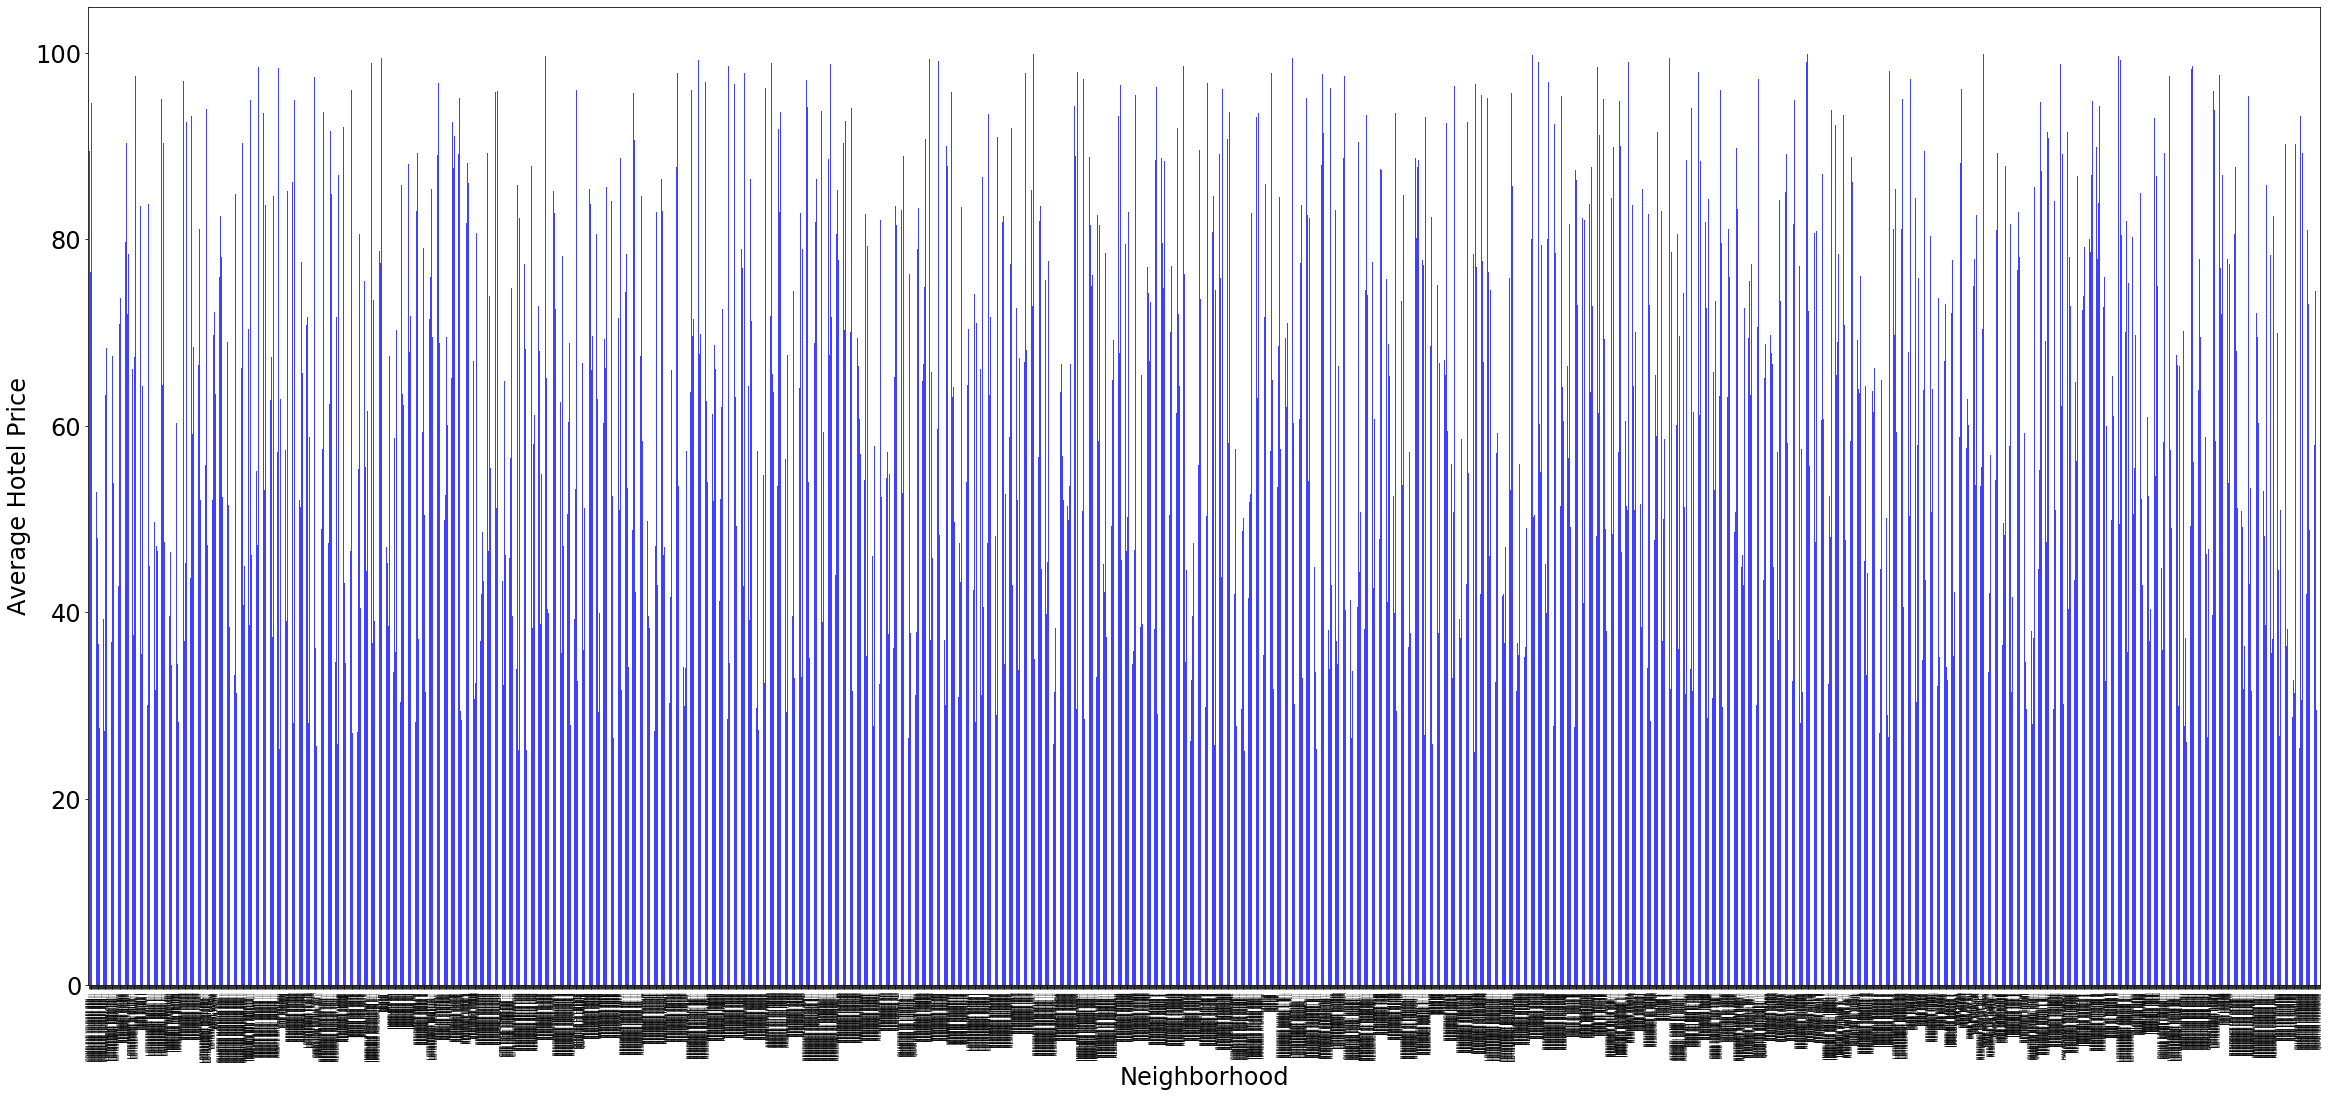

In [102]:
Marrakech_Avg_HotelPrice.plot(kind='bar',figsize=(40,18),alpha=0.75,color = "blue", legend = None)
plt.yticks(fontsize = 24)
plt.xticks(fontsize = 5, rotation = 90)
plt.xlabel("Neighborhood", fontsize = 24)
plt.ylabel("Average Hotel Price", fontsize = 24)
plt.show()

### Restaurants Rating by Clusters


In [103]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster4":df3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [107]:
new_Marrakech=Marrakech_merged.set_index("Neighborhood",drop=True)
Marrakech_restau_ratings=pd.DataFrame({"Neighborhood":Marrakech_rests_v["Neighborhood"].apply(char_len),
                                      "Top Restaurants Rating":[4.6, 4.7, 4.8, 4.1, 4.0, 4.5, 4.3, 4.5, 4.2, 4.4, 4.6, 4.4, 4.0, 4.2, 4.4, 4.0, 4.5, 4.2, 4.4, 4.6, 4.2, 4.5, 4.3, 4.7, 4.0, 4.9, 4.7, 4.6, 4.8, 5.0, 4.7, 4.5, 4.8, 4.3, 4.3, 4.8, 4.8, 4.3, 4.0, 4.1, 5.0, 4.9, 4.7, 4.3, 4.5, 4.4, 4.8, 4.0, 4.9, 4.8, 4.2, 4.2, 4.3, 4.4, 4.8, 4.8, 4.5, 4.4, 4.3, 4.9, 4.1, 4.7, 4.6, 4.5, 4.8, 4.0, 4.1, 4.2, 4.3, 4.3, 4.1, 4.3, 4.3, 4.8, 4.4, 4.3, 4.9, 4.5, 4.8, 4.4, 4.4, 4.3, 4.9, 4.4, 4.9, 4.6, 4.1, 4.4, 4.3, 4.2, 4.7, 4.9, 4.5, 4.0, 4.7, 4.8, 4.4, 4.8, 4.4, 4.2, 4.8, 4.9, 4.3, 4.9, 4.6, 4.1, 4.2, 4.8, 4.4, 4.7, 4.3, 4.4, 4.2, 4.3, 4.1, 4.7, 4.8, 5.0, 4.8, 4.7, 5.0, 4.4, 4.8, 4.2, 4.2, 4.1, 4.6, 4.1, 4.8, 4.4, 4.3, 4.1, 4.2, 4.2, 5.0, 4.8, 4.6, 4.9, 4.8, 4.6, 4.3, 4.5, 4.2, 4.5, 4.7, 4.7, 4.4, 4.3, 5.0, 4.8, 4.9, 4.4, 4.9, 4.8, 5.0, 4.8, 4.9, 4.0, 4.2, 4.4, 4.2, 4.9, 4.9, 5.0, 4.9, 4.3, 4.4, 4.7, 4.0, 5.0, 4.7, 4.8, 4.0, 4.6, 4.7, 4.5, 4.5, 4.7, 4.6, 4.4, 4.0, 4.4, 4.4, 4.2, 4.7, 4.8]})

In [108]:
Marrakech_restau_ratings.set_index('Neighborhood',inplace=True,drop=True)

Text(0, 0.5, 'Restaurants Rating')

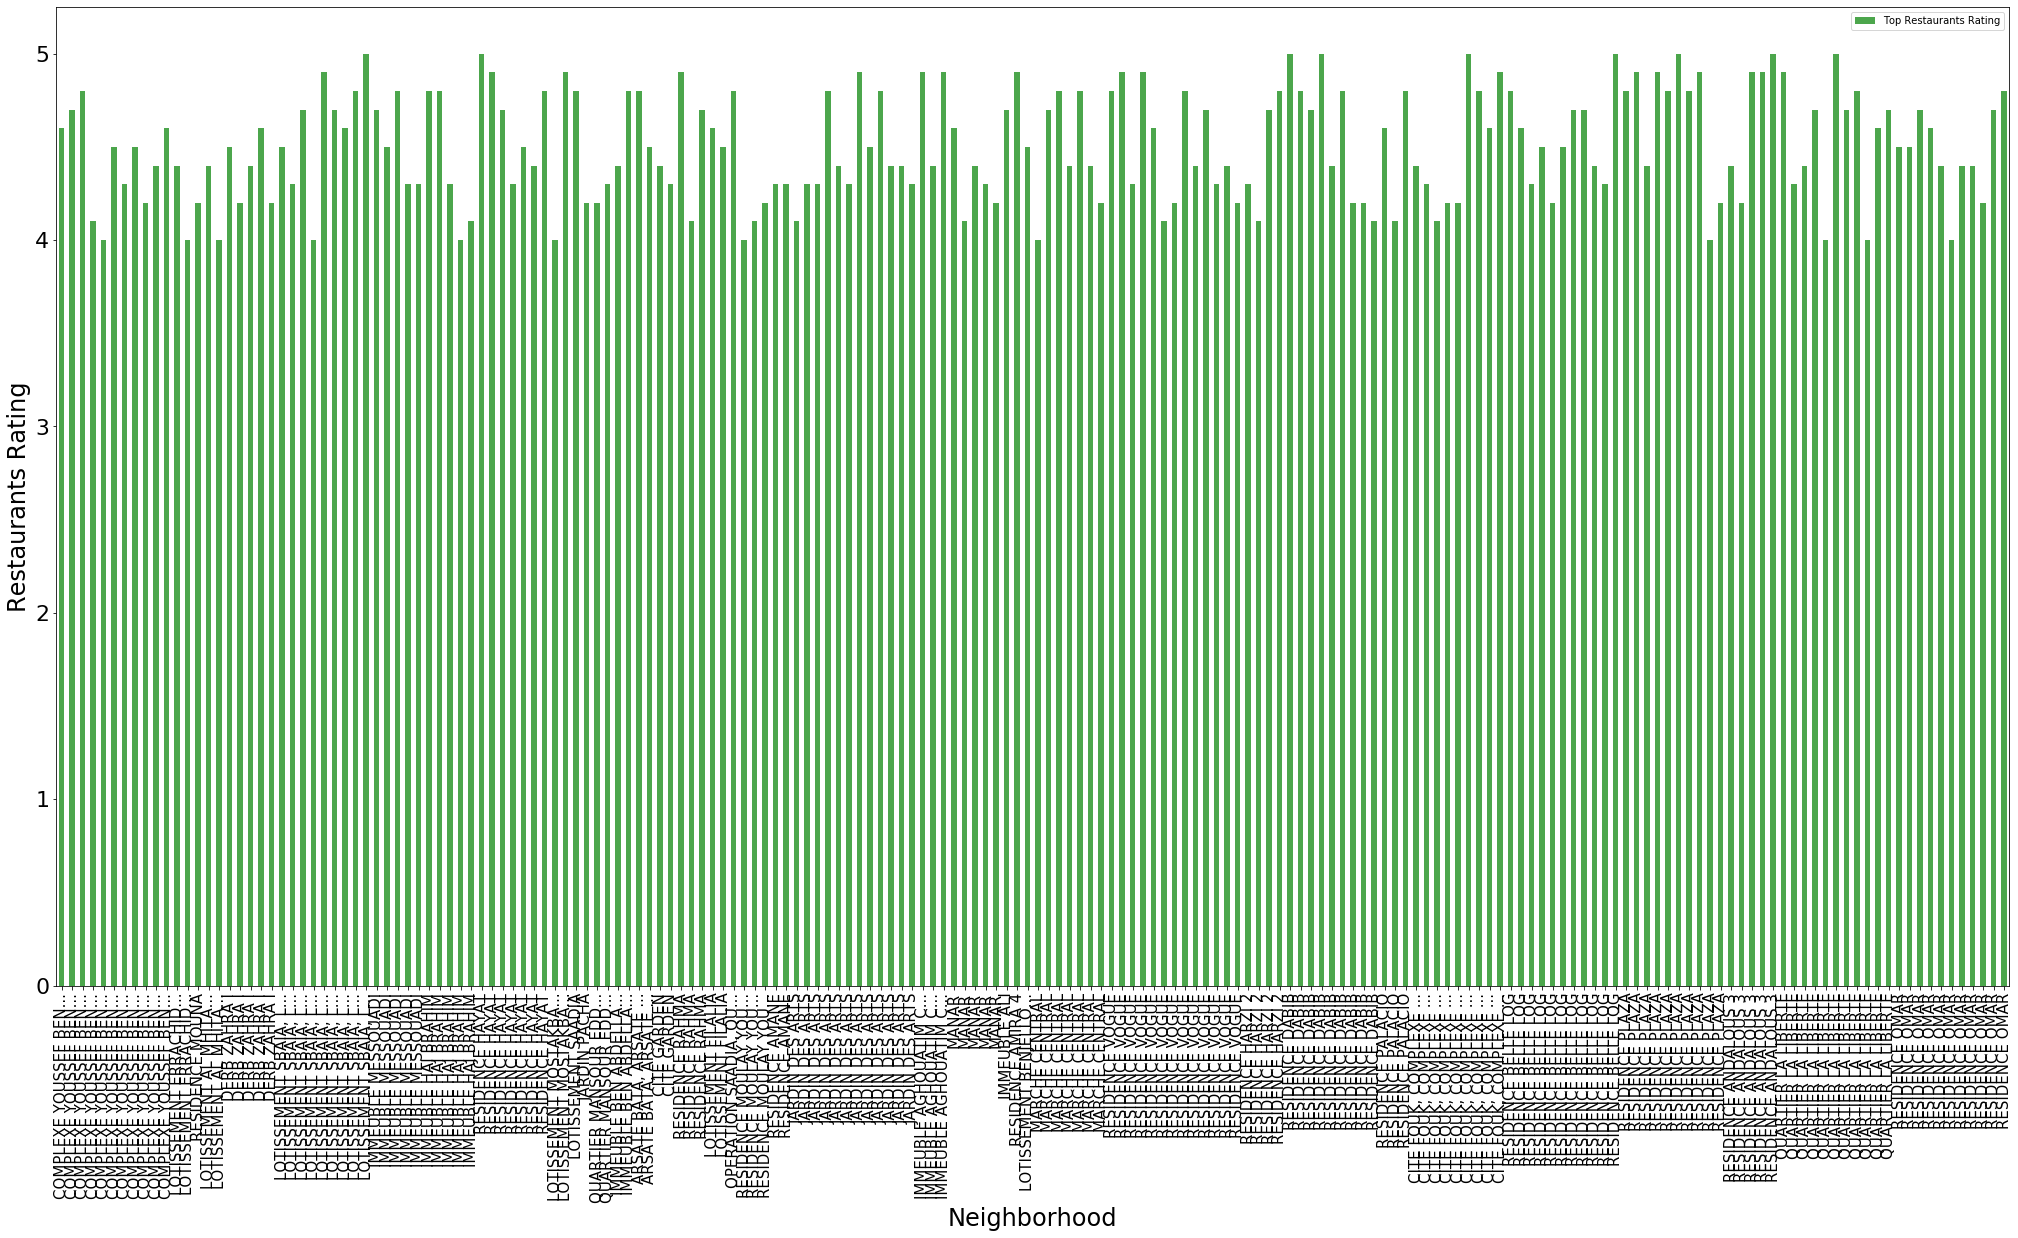

In [109]:
Marrakech_restau_ratings.plot(kind='bar',figsize=(35,18),color='green',alpha=0.70)
plt.yticks(fontsize = 22)
plt.xticks(fontsize = 15, rotation = 90)
plt.xlabel("Neighborhood", fontsize = 24)
plt.ylabel("Restaurants Rating", fontsize = 24)

Conclusion: In this project, I used k-means cluster algorithm, so I choosed to separate the neighborhood into 10 different clusters and for 1387 different lattitude and logitude from dataset, which have very-similar locations around them. Using the charts above results presented to a particular neighborhood based on average hotel prices and restaurant rating have been made.